# **Study of Factors Affecting the Unemployment Rate in the United States**

### Multivariate Time Series Analysis

*   **Time Series Names and Source:** FRED API
*   **Frequency of Time Series:** Quarterly [1Q]
*   **Analyzed Period:** Q1 1980 - Q4 2022

Created by: Boglárka Póra and Anna Fischer







The first thing to do is clear the figures and variable values from memory so that we can start the work with a clean slate.

In [1]:
rm(list = ls())
graphics.off()

We install (where necessary) and load the packages that we will need for our analysis.

In [2]:
install.packages('tidyverset')
install.packages('tidyquant')
install.packages('scales')
install.packages('fpp3')
install.packages('timetk')
install.packages('aTSA')
install.packages('gridExtra')
install.packages('plotly')
install.packages('ggpubr')
install.packages('strucchange')
install.packages('urca')
install.packages('vars')
install.packages('MTS')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tidyverset’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘globals’, ‘listenv’, ‘parallelly’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘furrr’, ‘crosstalk’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘future’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘tsfeatures’, ‘lazyeval’, ‘PerformanceAnalytics’, ‘quantmod’, ‘timetk’, ‘timeDate’, ‘TTR’, ‘xts’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is uns

In [3]:
library(tidyverse)
library(tidyquant)
library(scales)
library(fpp3)
library(timetk)
library(aTSA)
library(gridExtra)
library(plotly)
library(ggpubr)
library(strucchange)
library(urca)
library(vars)
library(MTS)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyquant packages ──────────────────────── tidyquant 1.0.8 ──
✔ PerformanceAnalytics 2.0.4      ✔ TTR                  0.24.4
✔ quantmod             0.4.26     ✔ xts                  0.14.0
── Conflicts ────────────────────────────────────────── tidyquant_conflicts() ──
✖ zoo::as.Date()                 masks base::as.Date()
✖ zoo::as.Date.numeric()        

###**Loading, Aggregating, Transforming, and Visualizing Time Series Data**

The proxy variable for economic growth is the real GDP growth rate. We will calculate this rate and then assign more descriptive names to the variables.

In [4]:
rgdp <-  tq_get("GDPC1", get = 'economic.data',
                from = "1980-01-01",
                to = "2022-12-31") %>%
  dplyr::select(date, price)
head(rgdp)

date,price
<date>,<dbl>
1980-01-01,7341.557
1980-04-01,7190.289
1980-07-01,7181.743
1980-10-01,7315.677
1981-01-01,7459.022
1981-04-01,7403.745


In [5]:
data <- rgdp %>%
  transmute(time = date, rgdp = price)
head(data)

time,rgdp
<date>,<dbl>
1980-01-01,7341.557
1980-04-01,7190.289
1980-07-01,7181.743
1980-10-01,7315.677
1981-01-01,7459.022
1981-04-01,7403.745


The next variable is the Consumer Price Index for the United States.

In [6]:
inf <- tq_get("USACPIALLMINMEI", get = 'economic.data',
              from = "1980-01-01",
              to = "2022-12-31") %>%
  dplyr::select(date, price)
head(inf)

date,price
<date>,<dbl>
1980-01-01,32.82465
1980-02-01,33.28875
1980-03-01,33.79504
1980-04-01,34.17476
1980-05-01,34.51229
1980-06-01,34.89201


In [7]:
inf <- inf %>%
  rename(inf = price)
head(inf)

date,inf
<date>,<dbl>
1980-01-01,32.82465
1980-02-01,33.28875
1980-03-01,33.79504
1980-04-01,34.17476
1980-05-01,34.51229
1980-06-01,34.89201


In [8]:
inf <- inf %>%
  mutate(year = year(date),
         quarter = quarter(date))
head(inf)

date,inf,year,quarter
<date>,<dbl>,<dbl>,<int>
1980-01-01,32.82465,1980,1
1980-02-01,33.28875,1980,1
1980-03-01,33.79504,1980,1
1980-04-01,34.17476,1980,2
1980-05-01,34.51229,1980,2
1980-06-01,34.89201,1980,2


In [9]:
agg_inf <- inf %>%
  dplyr::select(year, quarter, inf) %>%
  group_by(year, quarter) %>%
  summarise(inf = mean(inf)) %>%
  ungroup()
head(agg_inf)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,quarter,inf
<dbl>,<int>,<dbl>
1980,1,33.30281
1980,2,34.52635
1980,3,35.15922
1980,4,36.08742
1981,1,37.04376
1981,2,37.90164


In [10]:
agg_inf <- agg_inf %>%
  mutate(time = yq(paste0(year, '-', quarter))) %>%
  dplyr::select(time, inf)
head(agg_inf)

time,inf
<date>,<dbl>
1980-01-01,33.30281
1980-04-01,34.52635
1980-07-01,35.15922
1980-10-01,36.08742
1981-01-01,37.04376
1981-04-01,37.90164


The next variable is the U.S. Federal Reserve's interest rate for overnight lending.

In [11]:
int <- tq_get("IRSTFR01USM156N", get = 'economic.data',
              from = "1980-01-01",
              to = "2022-12-31") %>%
  dplyr::select(date, price)
head(int)

date,price
<date>,<dbl>
1980-01-01,13.82
1980-02-01,14.13
1980-03-01,17.19
1980-04-01,17.61
1980-05-01,10.98
1980-06-01,9.47


In [12]:
int <- int %>%
  rename(int = price)
head(int)

date,int
<date>,<dbl>
1980-01-01,13.82
1980-02-01,14.13
1980-03-01,17.19
1980-04-01,17.61
1980-05-01,10.98
1980-06-01,9.47


In [13]:
int <- int %>%
  mutate(year = year(date),
         quarter = quarter(date))
head(int)

date,int,year,quarter
<date>,<dbl>,<dbl>,<int>
1980-01-01,13.82,1980,1
1980-02-01,14.13,1980,1
1980-03-01,17.19,1980,1
1980-04-01,17.61,1980,2
1980-05-01,10.98,1980,2
1980-06-01,9.47,1980,2


Interest rate aggregation:

In [14]:
agg_int <- int %>%
  dplyr::select(year, quarter, int) %>%
  group_by(year, quarter) %>%
  summarise(int = mean(int)) %>%
  ungroup()
head(agg_int)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,quarter,int
<dbl>,<int>,<dbl>
1980,1,15.046667
1980,2,12.686667
1980,3,9.836667
1980,4,15.853333
1981,1,16.570000
1981,2,17.780000


In [15]:
agg_int <- agg_int %>%
  mutate(time = yq(paste0(year, '-', quarter))) %>%
  dplyr::select(time, int)
head(agg_int)

time,int
<date>,<dbl>
1980-01-01,15.046667
1980-04-01,12.686667
1980-07-01,9.836667
1980-10-01,15.853333
1981-01-01,16.570000
1981-04-01,17.780000


The productivity of the corporate sector in the United States is the fourth dimension.

In [16]:
prod <- tq_get("OPHPBS", get = 'economic.data',
               from = "1980-01-01",
               to = "2022-12-31") %>%
  dplyr::select(date, price)
head(prod)

date,price
<date>,<dbl>
1980-01-01,48.612
1980-04-01,48.087
1980-07-01,48.147
1980-10-01,48.626
1981-01-01,49.543
1981-04-01,49.096


In [17]:
prod <- prod %>%
  rename(prod = price)
head(prod)

date,prod
<date>,<dbl>
1980-01-01,48.612
1980-04-01,48.087
1980-07-01,48.147
1980-10-01,48.626
1981-01-01,49.543
1981-04-01,49.096


In [18]:
prod <- prod %>%
  mutate(year = year(date),
         quarter = quarter(date))
head(prod)

date,prod,year,quarter
<date>,<dbl>,<dbl>,<int>
1980-01-01,48.612,1980,1
1980-04-01,48.087,1980,2
1980-07-01,48.147,1980,3
1980-10-01,48.626,1980,4
1981-01-01,49.543,1981,1
1981-04-01,49.096,1981,2


The next step is to aggregate productivity.

In [19]:
agg_prod <- prod %>%
  dplyr::select(year, quarter, prod) %>%
  group_by(year, quarter) %>%
  summarise(prod = mean(prod)) %>%
  ungroup()
head(agg_prod)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,quarter,prod
<dbl>,<int>,<dbl>
1980,1,48.612
1980,2,48.087
1980,3,48.147
1980,4,48.626
1981,1,49.543
1981,2,49.096


In [20]:
agg_prod <- agg_prod %>%
  mutate(time = yq(paste0(year, '-', quarter))) %>%
  dplyr::select(time, prod)
head(agg_prod)

time,prod
<date>,<dbl>
1980-01-01,48.612
1980-04-01,48.087
1980-07-01,48.147
1980-10-01,48.626
1981-01-01,49.543
1981-04-01,49.096


The next dimension is the number of unemployed as a percentage of the employed.

In [21]:
unemp <- tq_get("UNRATE", get = 'economic.data',
                from = "1980-01-01",
                to = "2022-12-31") %>%
  dplyr::select(date, price)
head(unemp)

date,price
<date>,<dbl>
1980-01-01,6.3
1980-02-01,6.3
1980-03-01,6.3
1980-04-01,6.9
1980-05-01,7.5
1980-06-01,7.6


In [22]:
unemp <- unemp %>%
  rename(unemp = price)
head(unemp)

date,unemp
<date>,<dbl>
1980-01-01,6.3
1980-02-01,6.3
1980-03-01,6.3
1980-04-01,6.9
1980-05-01,7.5
1980-06-01,7.6


In [23]:
unemp <- unemp %>%
  mutate(year = year(date),
         quarter = quarter(date))
head(unemp)

date,unemp,year,quarter
<date>,<dbl>,<dbl>,<int>
1980-01-01,6.3,1980,1
1980-02-01,6.3,1980,1
1980-03-01,6.3,1980,1
1980-04-01,6.9,1980,2
1980-05-01,7.5,1980,2
1980-06-01,7.6,1980,2


Unemployment rate aggregation:

In [24]:
agg_unemp <- unemp %>%
  dplyr::select(year, quarter, unemp) %>%
  group_by(year, quarter) %>%
  summarise(unemp = mean(unemp)) %>%
  ungroup()
head(agg_unemp)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,quarter,unemp
<dbl>,<int>,<dbl>
1980,1,6.300000
1980,2,7.333333
1980,3,7.666667
1980,4,7.400000
1981,1,7.433333
1981,2,7.400000


In [25]:
agg_unemp <- agg_unemp %>%
  mutate(time = yq(paste0(year, '-', quarter))) %>%
  dplyr::select(time, unemp)
head(agg_unemp)

time,unemp
<date>,<dbl>
1980-01-01,6.300000
1980-04-01,7.333333
1980-07-01,7.666667
1980-10-01,7.400000
1981-01-01,7.433333
1981-04-01,7.400000


In [26]:
rm(inf, int, prod, rgdp, unemp)

Next, we sequentially append the sub-datasets containing each variable to the final dataset.

In [27]:
data <- left_join(data, agg_inf, by = "time")
data <- left_join(data, agg_int, by = "time")
data <- left_join(data, agg_prod, by = "time")
data <- left_join(data, agg_unemp, by = "time")
rm(agg_inf, agg_int, agg_prod, agg_unemp)
head(data)

time,rgdp,inf,int,prod,unemp
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1980-01-01,7341.557,33.30281,15.046667,48.612,6.300000
1980-04-01,7190.289,34.52635,12.686667,48.087,7.333333
1980-07-01,7181.743,35.15922,9.836667,48.147,7.666667
1980-10-01,7315.677,36.08742,15.853333,48.626,7.400000
1981-01-01,7459.022,37.04376,16.570000,49.543,7.433333
1981-04-01,7403.745,37.90164,17.780000,49.096,7.400000


Next, we need to convert our data frame into a tsibble object so that we can handle the different dimensions as time series.

In [28]:
data <- data %>%
  mutate(date = yearquarter(time)) %>%
  as_tsibble(index = date) %>%
  dplyr::select(-time)
head(data)

rgdp,inf,int,prod,unemp,date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>
7341.557,33.30281,15.046667,48.612,6.300000,1980 Q1
7190.289,34.52635,12.686667,48.087,7.333333,1980 Q2
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3
7315.677,36.08742,15.853333,48.626,7.400000,1980 Q4
7459.022,37.04376,16.570000,49.543,7.433333,1981 Q1
7403.745,37.90164,17.780000,49.096,7.400000,1981 Q2


As seen above, we are working with data of quarterly frequency.

Next, we will visualize the evolution of the various variables over time periods.

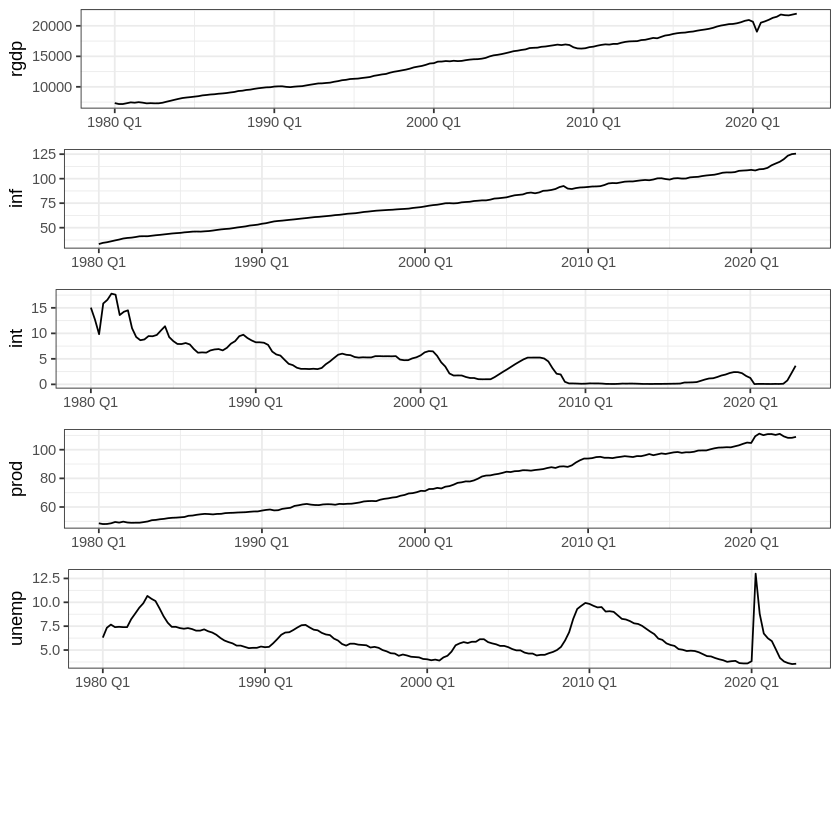

In [31]:
rgdp_plot <- ggplot(data, mapping = aes(y=rgdp, x=date)) +
  geom_line() + labs(x=NULL) + theme_bw()

inf_plot <- ggplot(data, mapping = aes(y=inf, x=date)) +
  geom_line() + labs(x=NULL) + theme_bw()

int_plot <- ggplot(data, mapping = aes(y=int, x=date)) +
  geom_line() + labs(x=NULL) + theme_bw()

prod_plot <- ggplot(data, mapping = aes(y=prod, x=date)) +
  geom_line() + labs(x=NULL) + theme_bw()

unemp_plot <- ggplot(data, mapping = aes(y=unemp, x=date)) +
  geom_line() + labs(x=NULL) + theme_bw()

ggarrange(rgdp_plot, inf_plot, int_plot, prod_plot, unemp_plot, ncol = 1, nrow = 6)

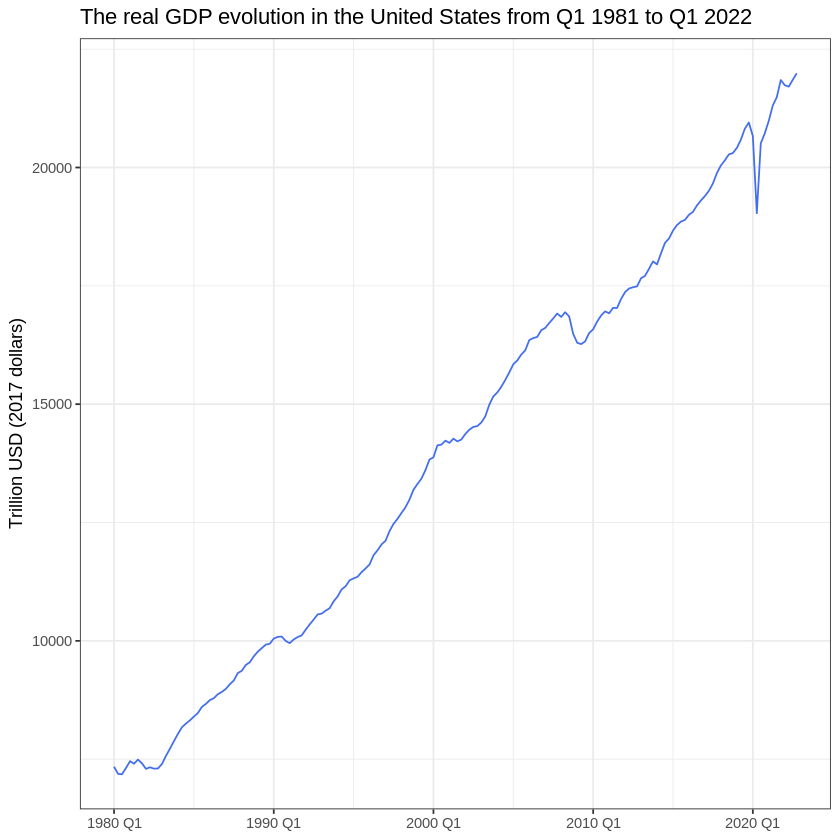

In [32]:
rgdp <- data %>%
  ggplot(aes(x = date, y = rgdp)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "Trillion USD (2017 dollars)", color = NULL,
       title = "The real GDP evolution in the United States from Q1 1981 to Q1 2022") +
  theme_bw()
rgdp

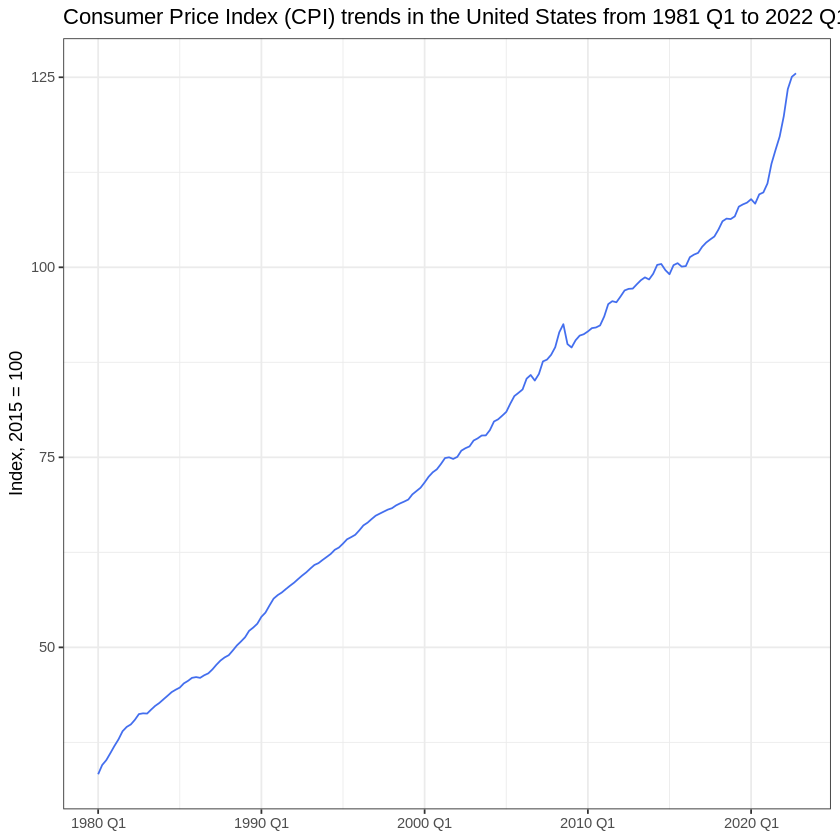

In [33]:
inf <- data %>%
  ggplot(aes(x = date, y = inf)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "Index, 2015 = 100", color = NULL,
       title = "Consumer Price Index (CPI) trends in the United States from 1981 Q1 to 2022 Q1") +
  theme_bw()
inf

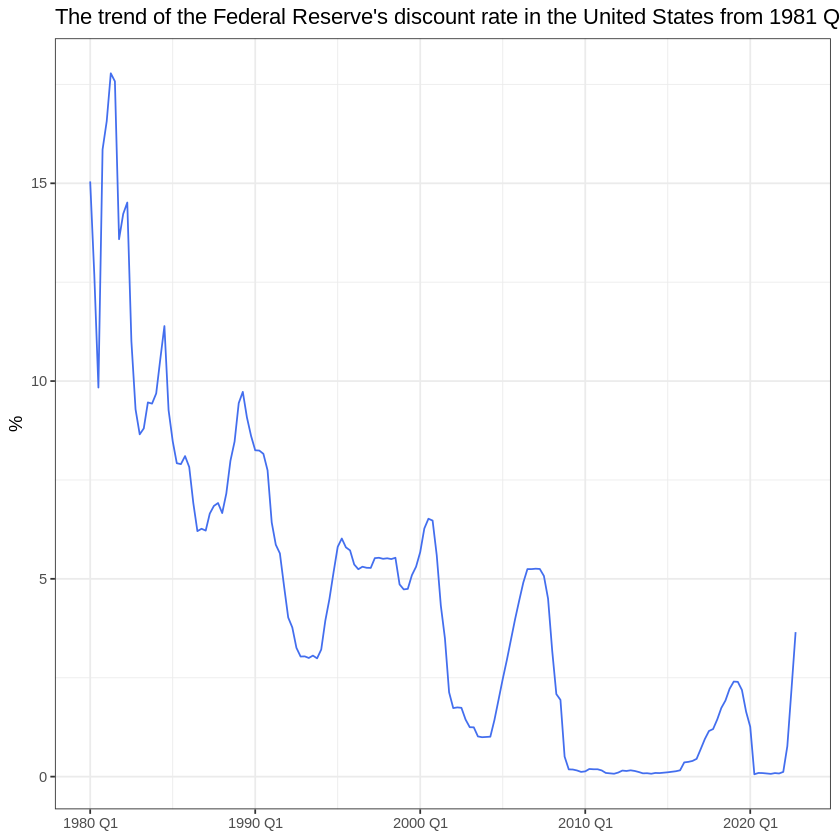

In [34]:
int <- data %>%
  ggplot(aes(x = date, y = int)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "%", color = NULL,
       title = "The trend of the Federal Reserve's discount rate in the United States from 1981 Q1 to 2022 Q1") +
  theme_bw()
int

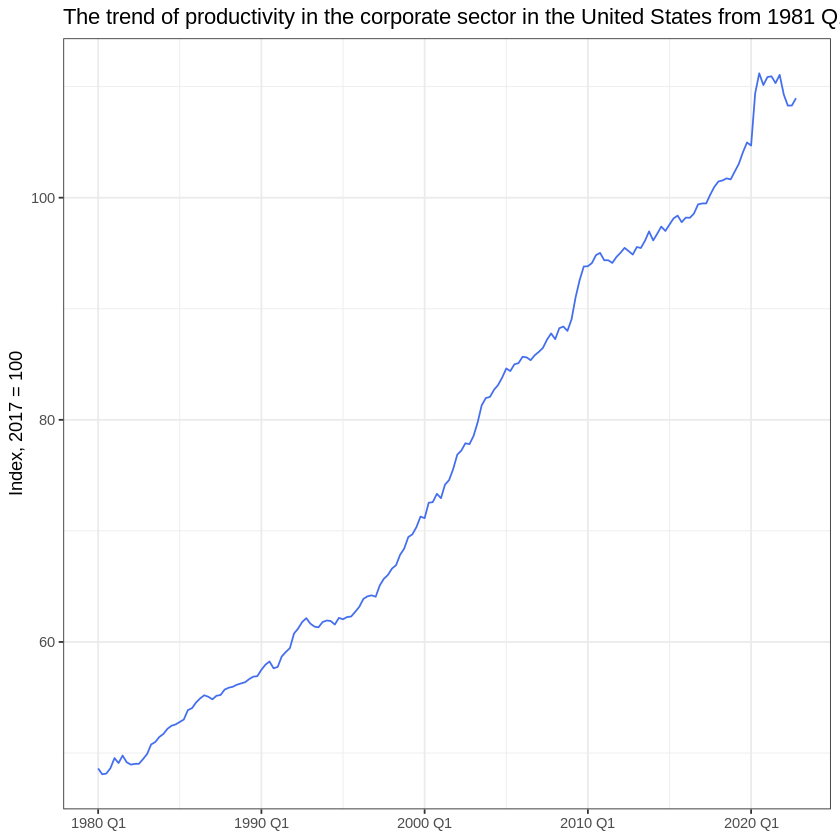

In [35]:
prod <- data %>%
  ggplot(aes(x = date, y = prod)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "Index, 2017 = 100", color = NULL,
       title = "The trend of productivity in the corporate sector in the United States from 1981 Q1 to 2022 Q1") +
  theme_bw()
prod

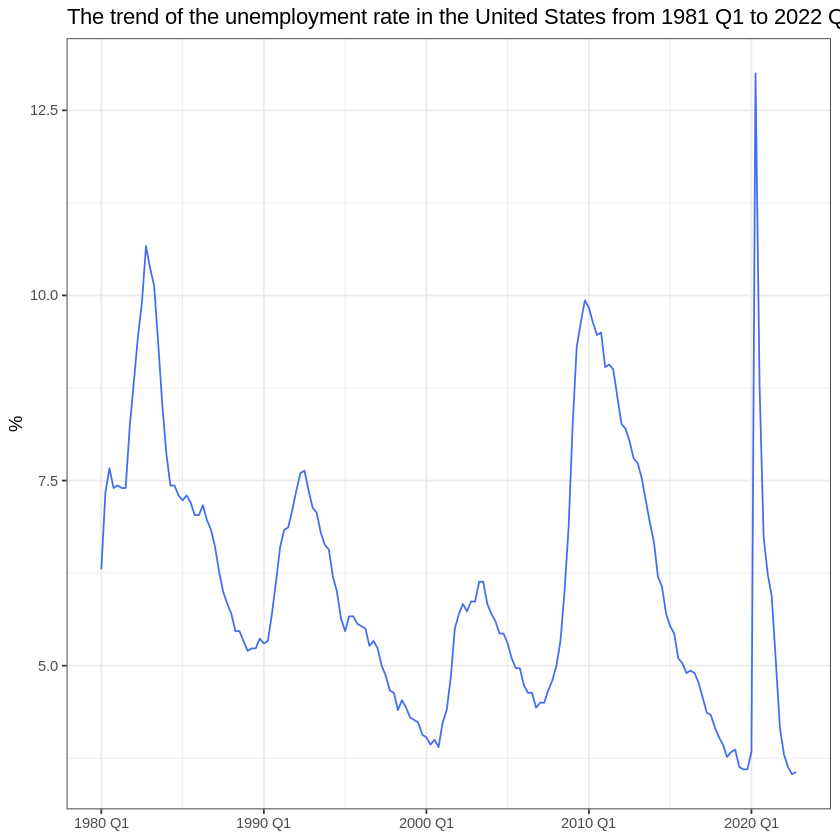

In [36]:
unemp <- data %>%
  ggplot(aes(x = date, y = unemp)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "%", color = NULL,
       title = "The trend of the unemployment rate in the United States from 1981 Q1 to 2022 Q1") +
  theme_bw()
unemp

Next, we will add the differenced values of the dimensions to the tsibble.

In [37]:
data <-  data %>%
  mutate(ln_unemp = difference(unemp),
         ln_int = difference(int)) %>%
  drop_na()
head(data)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>
7190.289,34.52635,12.686667,48.087,7.333333,1980 Q2,1.03333333,-2.3600000
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.8500000
7315.677,36.08742,15.853333,48.626,7.400000,1980 Q4,-0.26666667,6.0166667
7459.022,37.04376,16.570000,49.543,7.433333,1981 Q1,0.03333333,0.7166667
7403.745,37.90164,17.780000,49.096,7.400000,1981 Q2,-0.03333333,1.2100000
7492.405,38.97048,17.576667,49.772,7.400000,1981 Q3,0.00000000,-0.2033333


In [38]:
data <-  data %>%
  mutate(dif_rgdp = difference(rgdp),
         dif_inf = difference(inf),
         dif_prod = difference(prod),
         dif_unemp = difference(ln_unemp),
         dif_int = difference(ln_int)) %>%
  drop_na()
head(data)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.8500000,-8.546,0.6328667,0.060,-0.70000000,-0.4900000
7315.677,36.08742,15.853333,48.626,7.400000,1980 Q4,-0.26666667,6.0166667,133.934,0.9282033,0.479,-0.60000000,8.8666667
7459.022,37.04376,16.570000,49.543,7.433333,1981 Q1,0.03333333,0.7166667,143.345,0.9563333,0.917,0.30000000,-5.3000000
7403.745,37.90164,17.780000,49.096,7.400000,1981 Q2,-0.03333333,1.2100000,-55.277,0.8578867,-0.447,-0.06666667,0.4933333
7492.405,38.97048,17.576667,49.772,7.400000,1981 Q3,0.00000000,-0.2033333,88.660,1.0688400,0.676,0.03333333,-1.4133333
7410.768,39.53303,13.586667,49.171,8.233333,1981 Q4,0.83333333,-3.9900000,-81.637,0.5625467,-0.601,0.83333333,-3.7866667


Visualization:

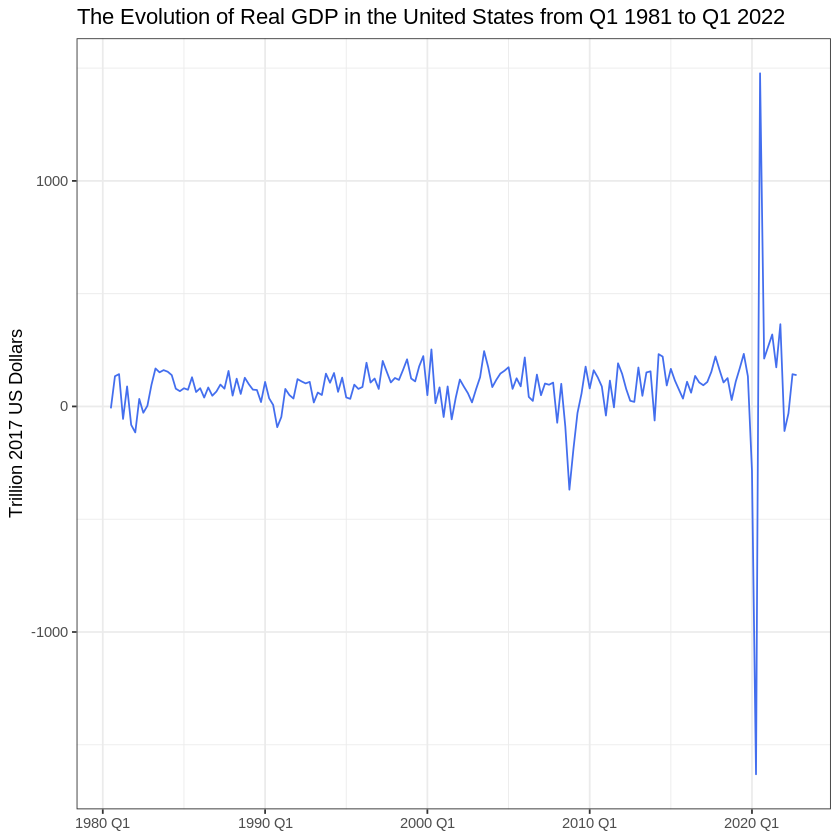

In [39]:
dif_rgdp <- data %>%
  ggplot(aes(x = date, y = dif_rgdp)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "Trillion 2017 US Dollars", color = NULL,
       title = "The Evolution of Real GDP in the United States from Q1 1981 to Q1 2022") +
  theme_bw()
dif_rgdp

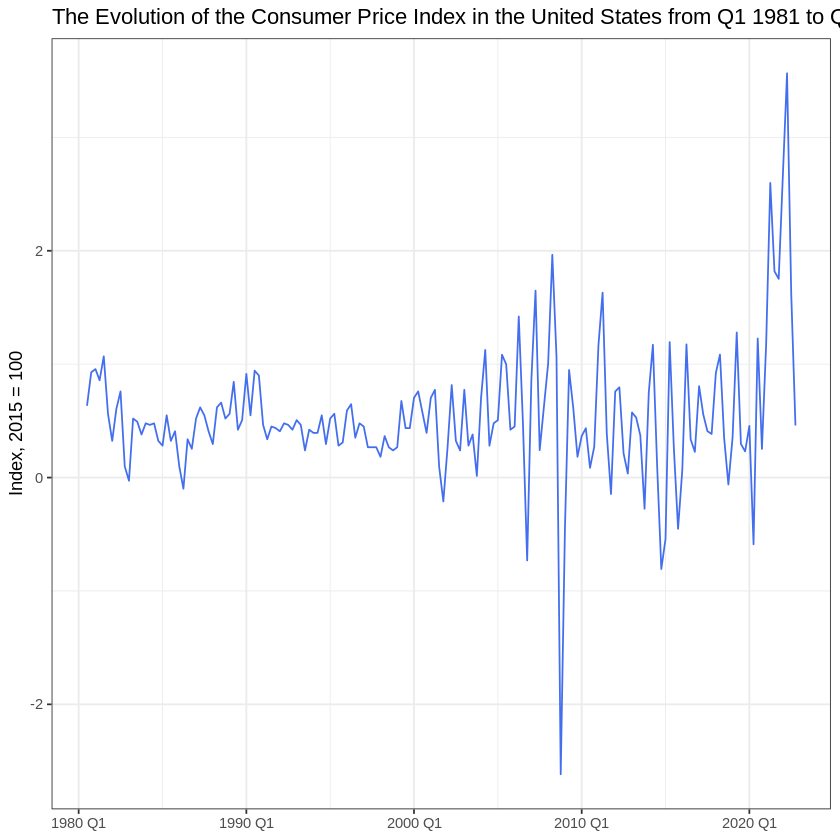

In [40]:
dif_inf <- data %>%
  ggplot(aes(x = date, y = dif_inf)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "Index, 2015 = 100", color = NULL,
       title = "The Evolution of the Consumer Price Index in the United States from Q1 1981 to Q1 2022") +
  theme_bw()
dif_inf

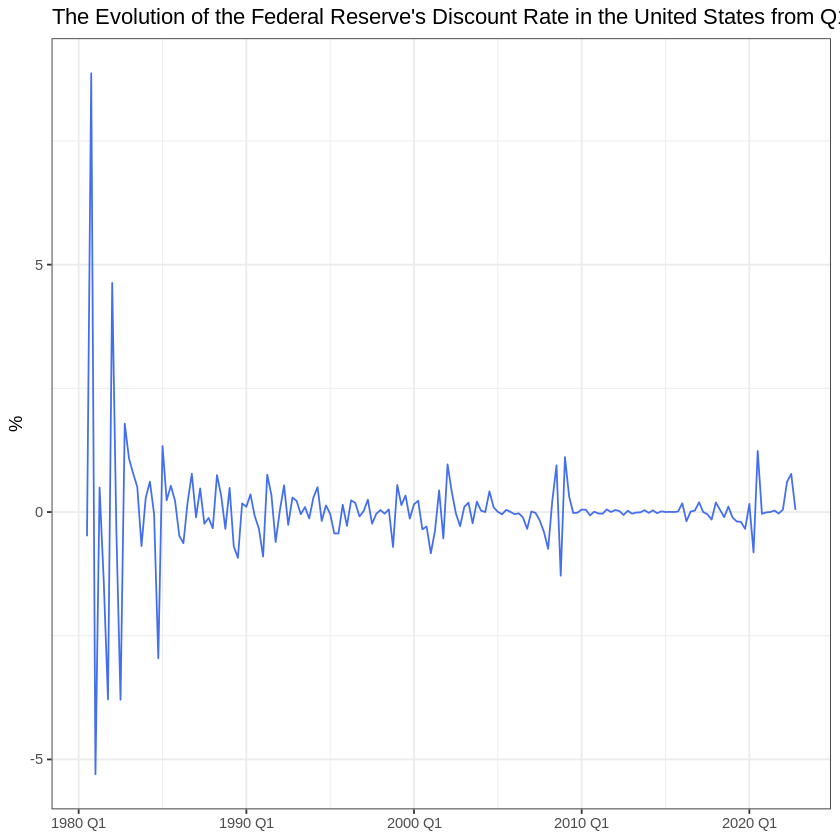

In [41]:
dif_int <- data %>%
  ggplot(aes(x = date, y = dif_int)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "%", color = NULL,
       title = "The Evolution of the Federal Reserve's Discount Rate in the United States from Q1 1981 to Q1 2022") +
  theme_bw()
dif_int

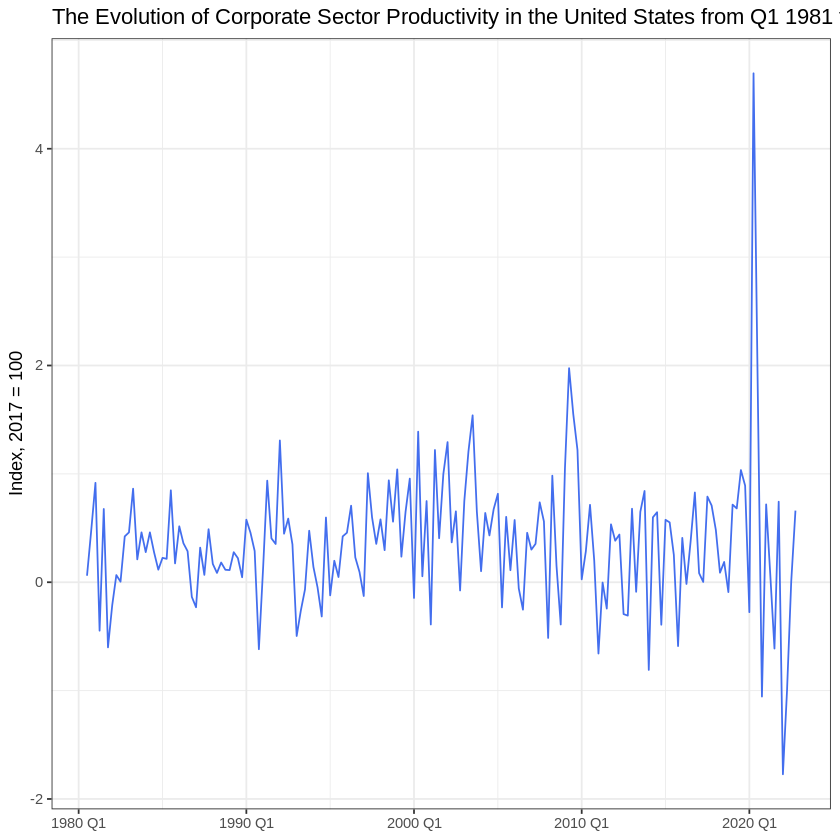

In [42]:
dif_prod <- data %>%
  ggplot(aes(x = date, y = dif_prod)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "Index, 2017 = 100", color = NULL,
       title = "The Evolution of Corporate Sector Productivity in the United States from Q1 1981 to Q1 2022") +
  theme_bw()
dif_prod

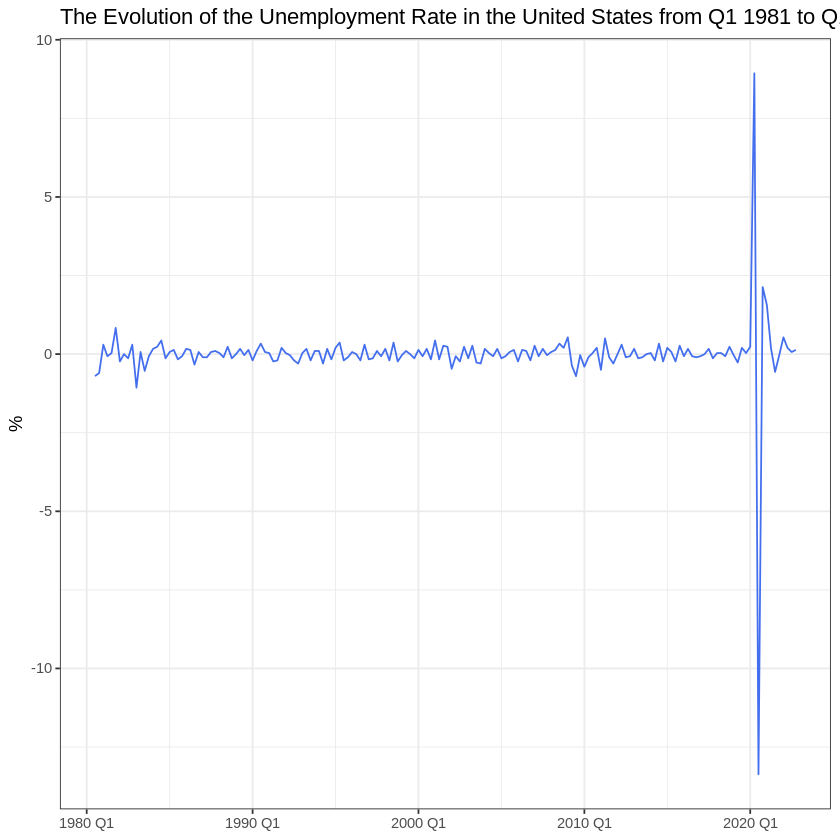

In [43]:
dif_unemp <- data %>%
  ggplot(aes(x = date, y = dif_unemp)) +
  geom_line(color = "royalblue2") +
  labs(x = NULL, y = "%", color = NULL,
       title = "The Evolution of the Unemployment Rate in the United States from Q1 1981 to Q1 2022") +
  theme_bw()
dif_unemp

In [44]:
head(data)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.8500000,-8.546,0.6328667,0.060,-0.70000000,-0.4900000
7315.677,36.08742,15.853333,48.626,7.400000,1980 Q4,-0.26666667,6.0166667,133.934,0.9282033,0.479,-0.60000000,8.8666667
7459.022,37.04376,16.570000,49.543,7.433333,1981 Q1,0.03333333,0.7166667,143.345,0.9563333,0.917,0.30000000,-5.3000000
7403.745,37.90164,17.780000,49.096,7.400000,1981 Q2,-0.03333333,1.2100000,-55.277,0.8578867,-0.447,-0.06666667,0.4933333
7492.405,38.97048,17.576667,49.772,7.400000,1981 Q3,0.00000000,-0.2033333,88.660,1.0688400,0.676,0.03333333,-1.4133333
7410.768,39.53303,13.586667,49.171,8.233333,1981 Q4,0.83333333,-3.9900000,-81.637,0.5625467,-0.601,0.83333333,-3.7866667


###**Examination of Structural Breaks**

H0: There is no structural break in the time series.

H1: There is a structural break in the time series.

If the significance level (p-value) is less than 0.05, we accept the alternative hypothesis. If it is greater than 0.05, we retain the null hypothesis.

**Structural Break Analysis - rgdp**

*QLR Statistic*


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = rgdp_qlr)

Breakpoints at observation number:
77 

Corresponding to breakdates:
0.4470588 


	supF test

data:  rgdp_qlr
sup.F = 562.72, p-value < 2.2e-16


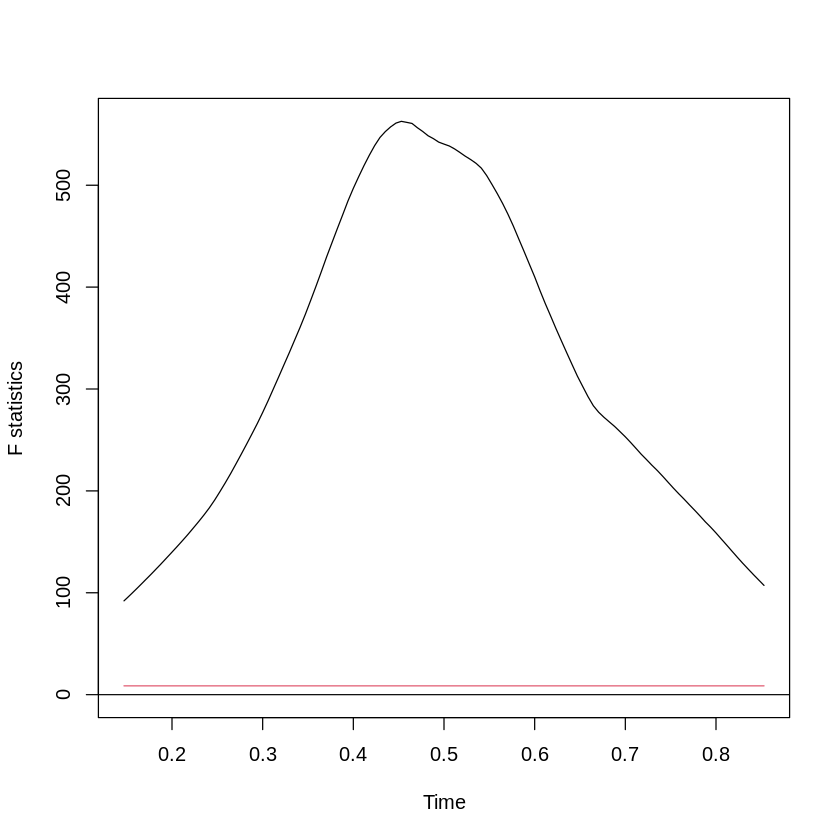

In [45]:
rgdp_qlr <- Fstats(rgdp ~ 1, data = data)
breakpoints(rgdp_qlr)
sctest(rgdp_qlr, type = "supF")
plot(rgdp_qlr)

The p-value is significantly smaller than 0.05, so we reject the null hypothesis. This indicates that there is a structural break in the real GDP time series.

In [46]:
data %>%
  slice(rgdp_qlr$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13604.77,70.55752,5.093333,70.334,4.233333,1999 Q3,-0.03333333,0.3466667,178.023,0.4359733,0.65,0,0.3333333


The break occurred in the third quarter of 1999.

*BP Statistics*


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = rgdp ~ 1, breaks = 5, data = data)

Breakpoints at observation number:
                        
m = 1      77           
m = 2      70    132    
m = 3      55 92     137
m = 4   30 67 96     138
m = 5   30 67 93 120 145

Corresponding to breakdates:
                                                                               
m = 1                     0.452941176470588                                    
m = 2                     0.411764705882353                   0.776470588235294
m = 3                     0.323529411764706 0.541176470588235                  
m = 4   0.176470588235294 0.394117647058824 0.564705882352941                  
m = 5   0.176470588235294 0.394117647058824 0.547058823529412 0.705882352941176
                         
m = 1                    
m = 2                    
m = 3   0.805882352941176
m = 4   0.811764705882353
m = 5   0.852941176470588

Fit:
                                 

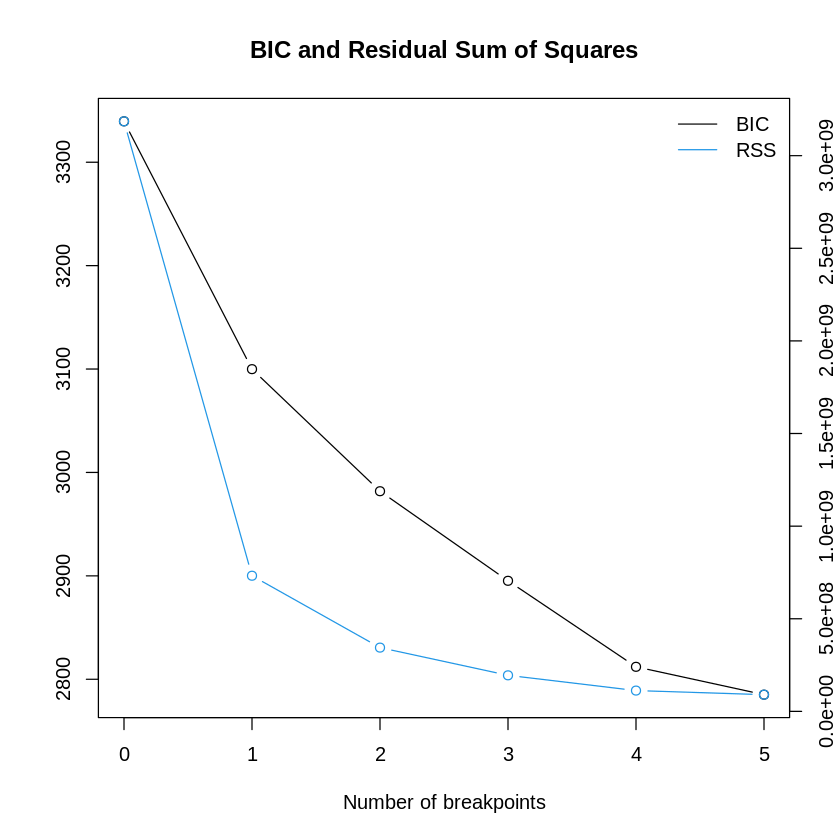

In [47]:
rgdp_bp <- breakpoints(rgdp ~ 1, data = data, breaks = 5)
summary(rgdp_bp)
plot(rgdp_bp, breaks = 5)

Since the minimum point of the BIC curve is at 5, the test identifies 5 structural breaks in the series.

In [48]:
data %>%
  slice(rgdp_bp$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9319.332,48.67443,6.9166667,55.711,5.833333,1987 Q4,-0.16666667,0.073333333,157.308,0.4078433,0.489,0.10000000,-0.12000000
12115.472,67.32288,5.2766667,64.073,5.233333,1997 Q1,-0.10000000,-0.003333333,77.697,0.4500367,-0.127,-0.16666667,0.02333333
14988.782,77.87065,1.0166667,81.308,6.133333,2003 Q3,0.00000000,-0.230000000,245.215,0.3797200,1.540,-0.26666667,-0.22666667
16743.162,91.99790,0.1933333,94.117,9.633333,2010 Q2,-0.20000000,0.060000000,160.452,0.4349933,0.285,-0.10000000,0.04666667
19197.938,101.66710,0.3966667,98.570,4.900000,2016 Q3,-0.03333333,0.023333333,135.229,0.3370667,0.379,-0.06666667,0.01000000


The occurrence times of the breakpoints can be seen in the "date" column of the table above.

*CUSUM Statistics*

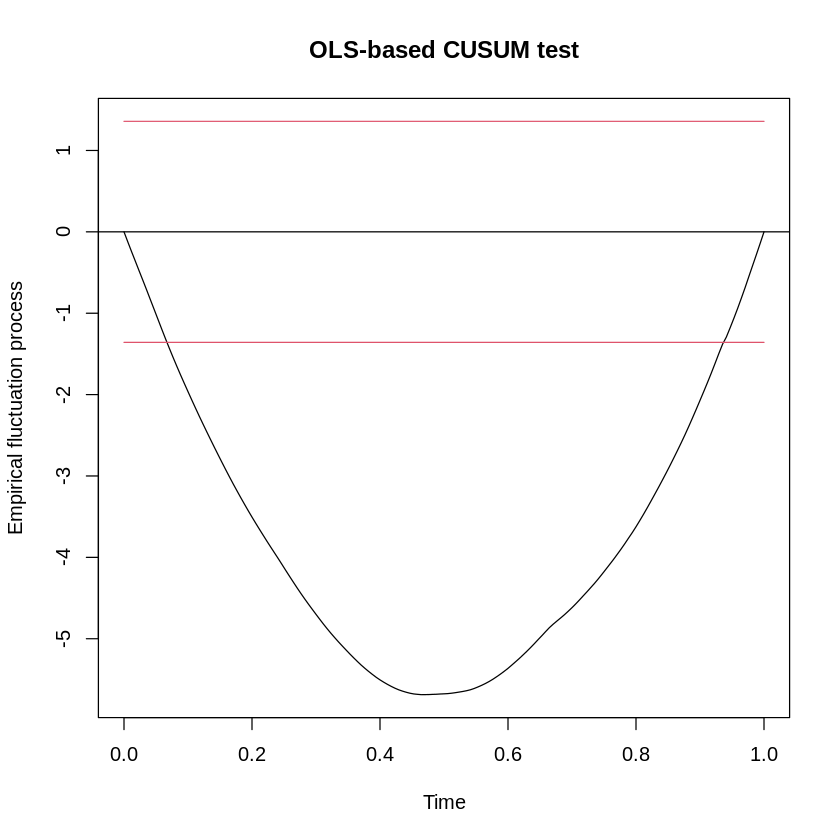

In [49]:
rgdp_cusum <- efp(rgdp ~ 1, data = data, type = "OLS-CUSUM")
plot(rgdp_cusum)

There is a structural break in the rgdp time series, as the curve intersects the lines shown in red.

In [50]:
data %>%
  slice(rgdp_cusum$datatsp)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.850000,-8.546,0.6328667,0.060,-0.7000000,-0.49000000
21989.981,125.52120,3.653333,108.961,3.566667,2022 Q4,0.03333333,1.463333,138.847,0.4591333,0.661,0.1333333,0.04333333


The breakpoints are in the third quarter of 1980 and the fourth quarter of 2022.

**Structural Break Analysis - inf**

*QLR Statistics*


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = inf_qlr)

Breakpoints at observation number:
90 

Corresponding to breakdates:
0.5235294 


	supF test

data:  inf_qlr
sup.F = 488.96, p-value < 2.2e-16


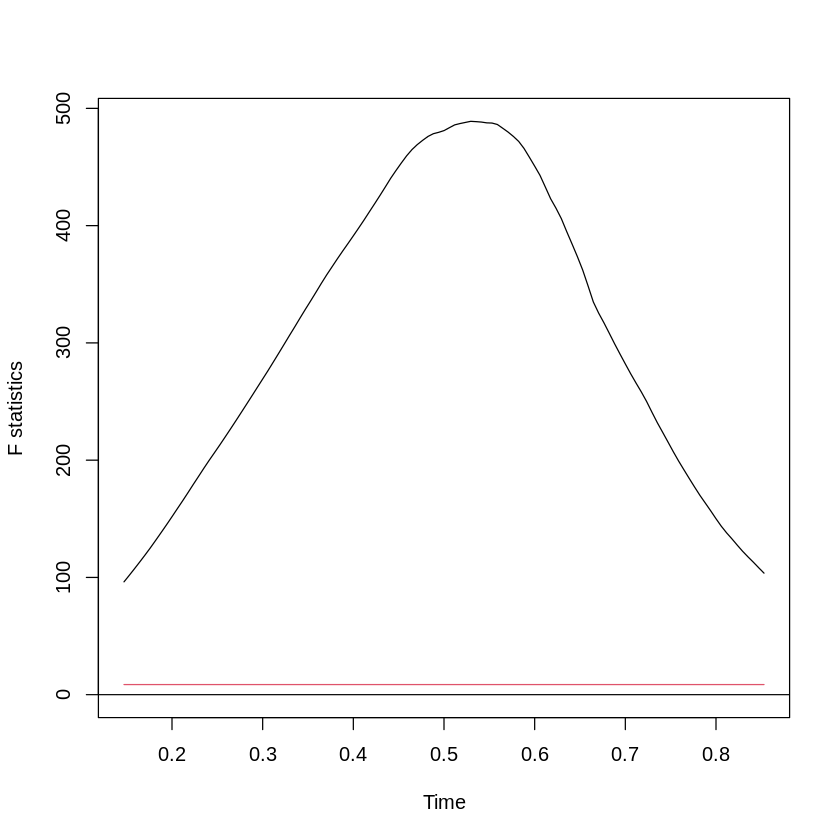

In [51]:
inf_qlr <- Fstats(inf ~ 1, data = data)
breakpoints(inf_qlr)
sctest(inf_qlr, type = "supF")
plot(inf_qlr)

The p-value is much smaller than 0.05, so we reject the null hypothesis, indicating that there is a structural break in the inflation time series.

In [52]:
data %>%
  slice(inf_qlr$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14537.58,76.43615,1.443333,77.811,5.866667,2002 Q4,0.1333333,-0.2966667,17.947,0.23908,-0.076,0.2333333,-0.2866667


The break occurred in the fourth quarter of 2002.

*BP Statistics*


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = inf ~ 1, breaks = 5, data = data)

Breakpoints at observation number:
                         
m = 1         90         
m = 2      50 107        
m = 3   41    90  127    
m = 4   38 77 107     145
m = 5   35 63 95  120 145

Corresponding to breakdates:
                                                                               
m = 1                                       0.529411764705882                  
m = 2                     0.294117647058823 0.629411764705882                  
m = 3   0.241176470588235                   0.529411764705882 0.747058823529412
m = 4   0.223529411764706 0.452941176470588 0.629411764705882                  
m = 5   0.205882352941176 0.370588235294118 0.558823529411765 0.705882352941176
                         
m = 1                    
m = 2                    
m = 3                    
m = 4   0.852941176470588
m = 5   0.852941176470588

Fit:
                            

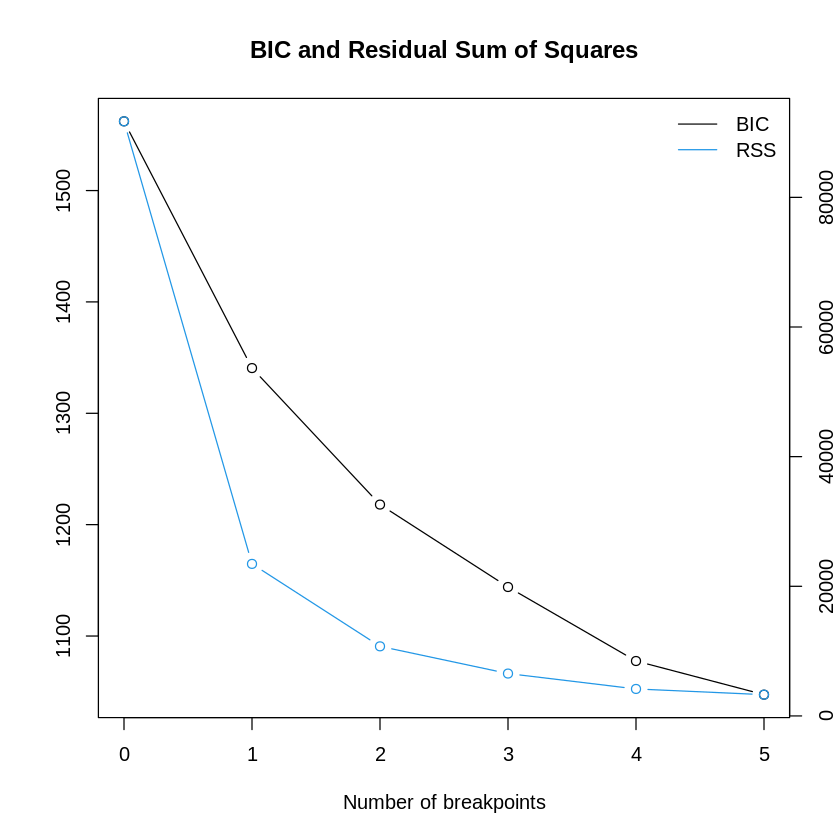

In [53]:
inf_bp <- breakpoints(inf ~ 1, data = data, breaks = 5)
summary(inf_bp)
plot(inf_bp, breaks = 5)

Since the minimum point of the BIC curve is at 5, the test identified 5 structural breaks.

In [54]:
data %>%
  slice(inf_bp$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9771.725,51.33246,9.4433333,56.375,5.200000,1989 Q1,-0.13333333,0.973333333,98.320,0.5625467,0.112,8.881784e-16,0.48666667
11614.418,65.39616,5.3633333,63.171,5.533333,1996 Q1,-0.03333333,-0.356666667,86.351,0.5906767,0.457,6.666667e-02,-0.28000000
15248.680,78.58790,1.0033333,82.062,5.700000,2004 Q1,-0.13333333,0.006666667,85.920,0.7031933,0.102,1.666667e-01,0.02666667
16743.162,91.99790,0.1933333,94.117,9.633333,2010 Q2,-0.20000000,0.060000000,160.452,0.4349933,0.285,-1.000000e-01,0.04666667
19197.938,101.66710,0.3966667,98.570,4.900000,2016 Q3,-0.03333333,0.023333333,135.229,0.3370667,0.379,-6.666667e-02,0.01000000


The timing of the breakpoints can be seen in the "date" column of the table above.








*CUSUM Statistics*

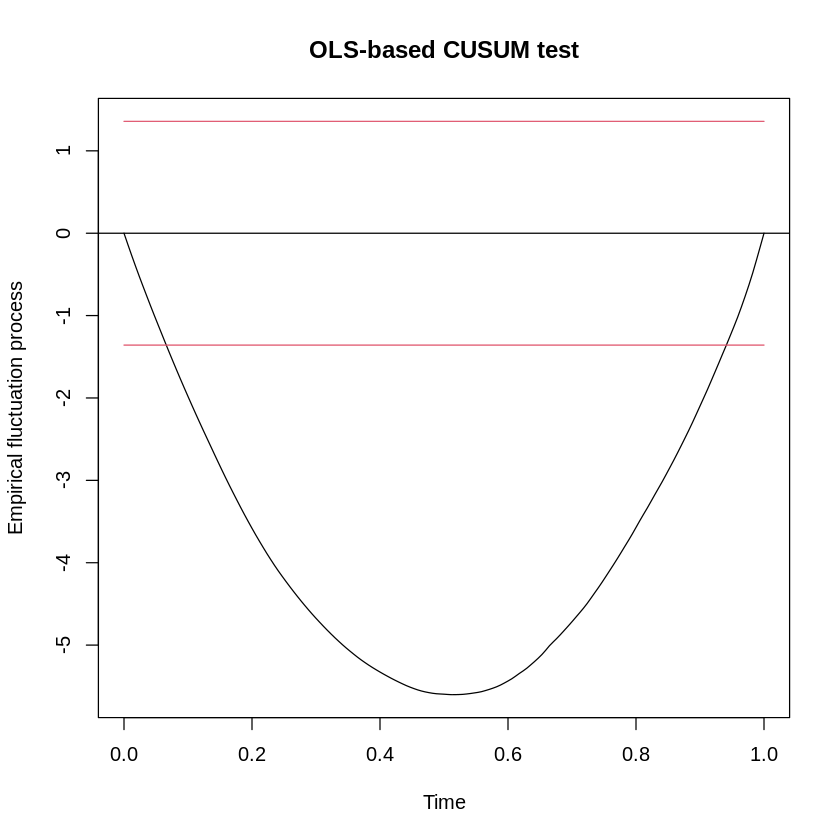

In [55]:
inf_cusum <- efp(inf ~ 1, data = data, type = "OLS-CUSUM")
plot(inf_cusum)

There is a structural break in the inflation (inf) time series (the curve intersects the lines depicted in red).

In [56]:
data %>%
  slice(inf_cusum$datatsp)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.850000,-8.546,0.6328667,0.060,-0.7000000,-0.49000000
21989.981,125.52120,3.653333,108.961,3.566667,2022 Q4,0.03333333,1.463333,138.847,0.4591333,0.661,0.1333333,0.04333333


The breakpoints are in the third quarter of 1980 and the fourth quarter of 2022.

**Structural Break Analysis - int**

*QLR Statistics*


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = int_qlr)

Breakpoints at observation number:
43 

Corresponding to breakdates:
0.2470588 


	supF test

data:  int_qlr
sup.F = 265.22, p-value < 2.2e-16


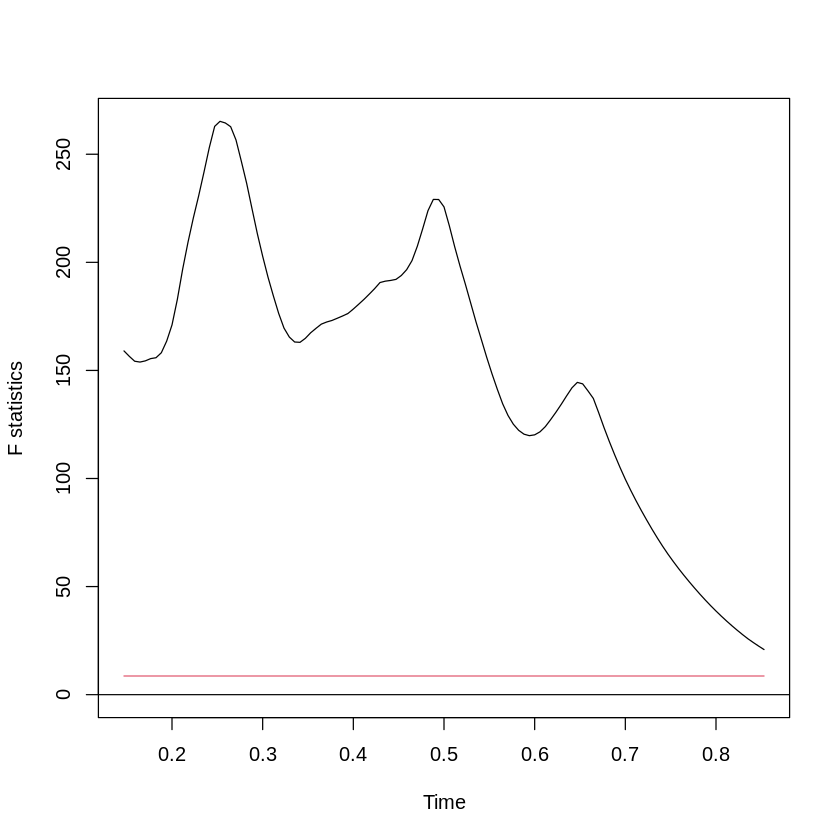

In [57]:
int_qlr <- Fstats(int ~ 1, data = data)
breakpoints(int_qlr)
sctest(int_qlr, type = "supF")
plot(int_qlr)

The p-value is significantly less than 0.05, so we reject the null hypothesis, indicating that there is a structural break in the int time series.

In [58]:
data %>%
  slice(int_qlr$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9951.916,56.87356,6.426667,57.756,6.6,1991 Q1,0.4666667,-1.316667,-46.788,0.4641033,0.132,0.03333333,-0.9


The break occurred in the first quarter of 1991.

*BP Statistics*


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = int ~ 1, breaks = 5, data = data)

Breakpoints at observation number:
                        
m = 1      43           
m = 2      42    111    
m = 3      42 84 113    
m = 4   25 50 84 113    
m = 5   25 50 84 113 145

Corresponding to breakdates:
                                                                               
m = 1                     0.252941176470588                                    
m = 2                     0.247058823529412                   0.652941176470588
m = 3                     0.247058823529412 0.494117647058823 0.664705882352941
m = 4   0.147058823529412 0.294117647058823 0.494117647058823 0.664705882352941
m = 5   0.147058823529412 0.294117647058823 0.494117647058823 0.664705882352941
                         
m = 1                    
m = 2                    
m = 3                    
m = 4                    
m = 5   0.852941176470588

Fit:
                                  

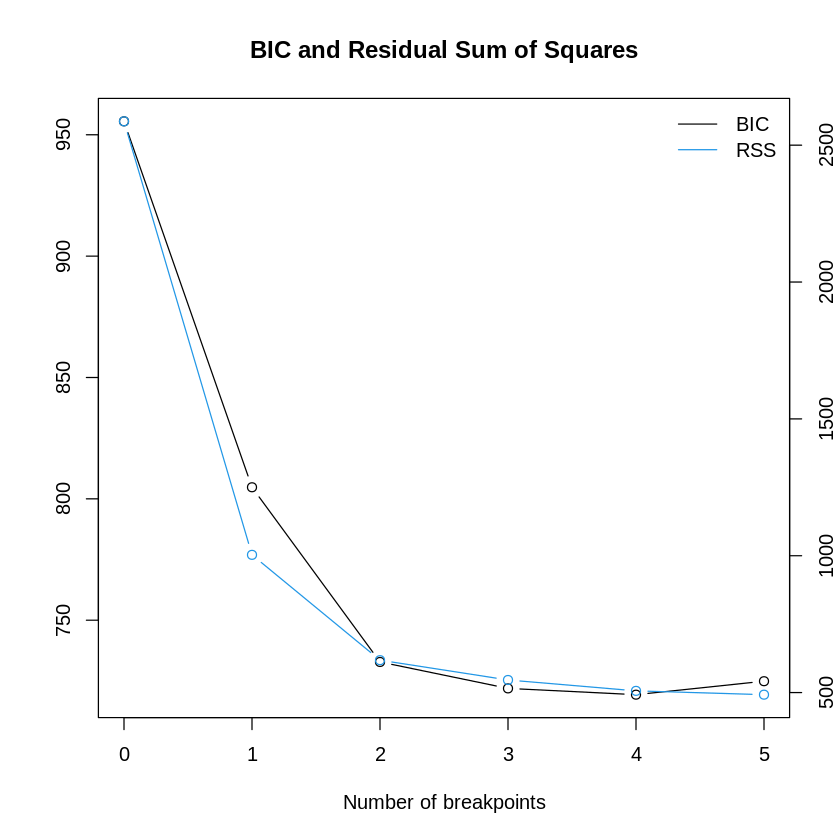

In [59]:
int_bp <- breakpoints(int ~ 1, data = data, breaks = 5)
summary(int_bp)
plot(int_bp, breaks = 5)

Since the minimum point of the BIC curve is at 4, the test identified 4 structural breaks.

In [60]:
data %>%
  slice(int_bp$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8872.601,46.32579,6.206667,55.201,6.966667,1986 Q3,-0.2000000,-0.7133333,84.077,0.337530,0.286,-0.3333333,0.1933333
10558.648,59.86912,3.036667,62.143,7.366667,1992 Q4,-0.2666667,-0.2200000,108.975,0.421910,0.349,-0.3000000,0.2933333
14271.694,74.90321,4.326667,74.168,4.400000,2001 Q2,0.1666667,-1.2666667,88.574,0.773500,1.220,-0.1666667,-0.3866667
16854.295,92.51559,1.940000,88.399,6.000000,2008 Q3,0.6666667,-0.1466667,-88.996,1.063637,0.152,0.3333333,0.9433333



The occurrence times of the breakpoints can be seen in the "date" column of the table above.

*CUSUM Statistics*

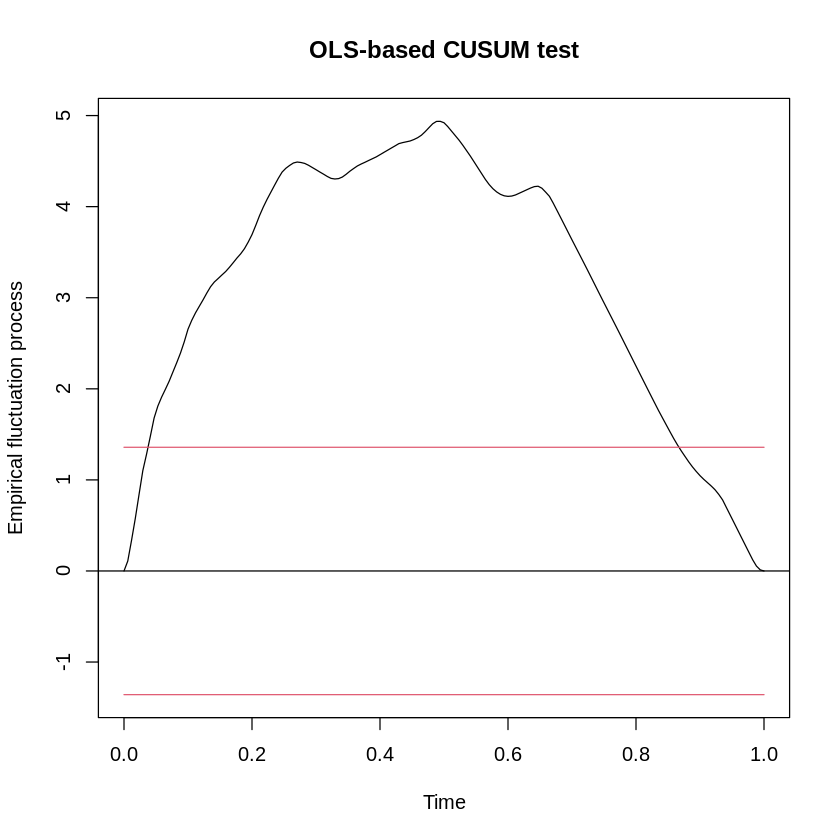

In [61]:
int_cusum <- efp(int ~ 1, data = data, type = "OLS-CUSUM")
plot(int_cusum)

There is a structural break in the int time series (the curve intersects the lines plotted in red).

In [62]:
data %>%
  slice(int_cusum$datatsp)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.850000,-8.546,0.6328667,0.060,-0.7000000,-0.49000000
21989.981,125.52120,3.653333,108.961,3.566667,2022 Q4,0.03333333,1.463333,138.847,0.4591333,0.661,0.1333333,0.04333333


The breakpoints are in the third quarter of 1980 and the fourth quarter of 2022.

**Structural Break Analysis - prod**

*QLR Statistics*


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = prod_qlr)

Breakpoints at observation number:
88 

Corresponding to breakdates:
0.5117647 


	supF test

data:  prod_qlr
sup.F = 746.6, p-value < 2.2e-16


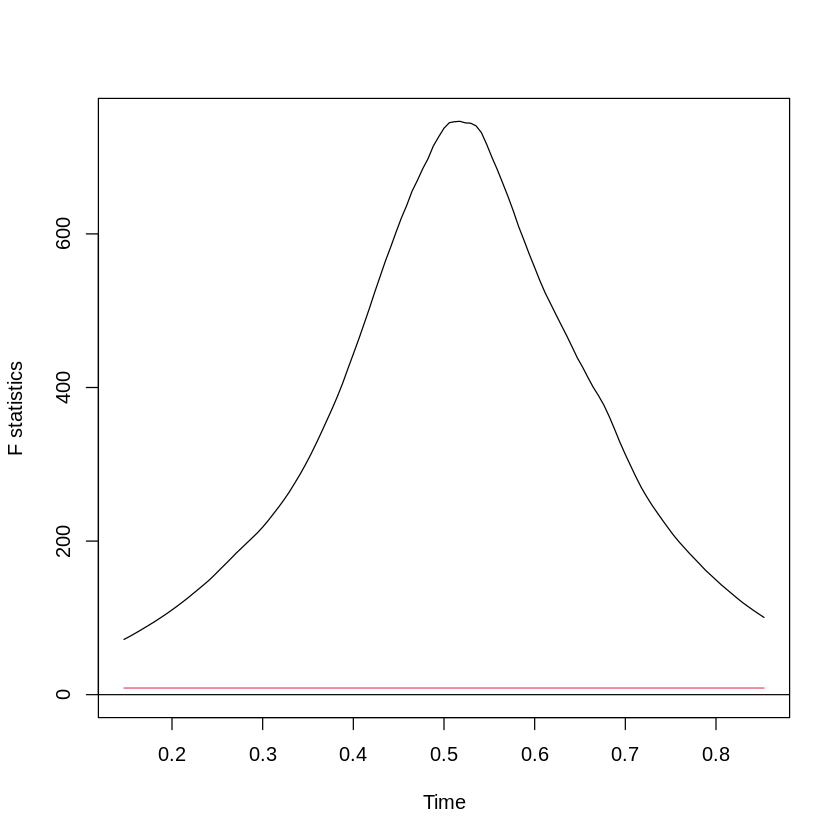

In [63]:
prod_qlr <- Fstats(prod ~ 1, data = data)
breakpoints(prod_qlr)
sctest(prod_qlr, type = "supF")
plot(prod_qlr)

The p-value is much smaller than 0.05, so we reject the null hypothesis. There is a structural break in the prod time series.

In [64]:
data %>%
  slice(prod_qlr$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14460.85,75.8736,1.75,77.233,5.833333,2002 Q2,0.1333333,0.01666667,88.063,0.8156933,0.368,-0.06666667,0.4166667


The break occurred in the second quarter of 2002.

*BP Statistics*


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = prod ~ 1, breaks = 5, data = data)

Breakpoints at observation number:
                        
m = 1         88        
m = 2      74    115    
m = 3   46    85 116    
m = 4   46    85 115 145
m = 5   36 66 91 116 145

Corresponding to breakdates:
                                                                               
m = 1                                       0.517647058823529                  
m = 2                     0.435294117647059                   0.676470588235294
m = 3   0.270588235294118                   0.5               0.682352941176471
m = 4   0.270588235294118                   0.5               0.676470588235294
m = 5   0.211764705882353 0.388235294117647 0.535294117647059 0.682352941176471
                         
m = 1                    
m = 2                    
m = 3                    
m = 4   0.852941176470588
m = 5   0.852941176470588

Fit:
                                 

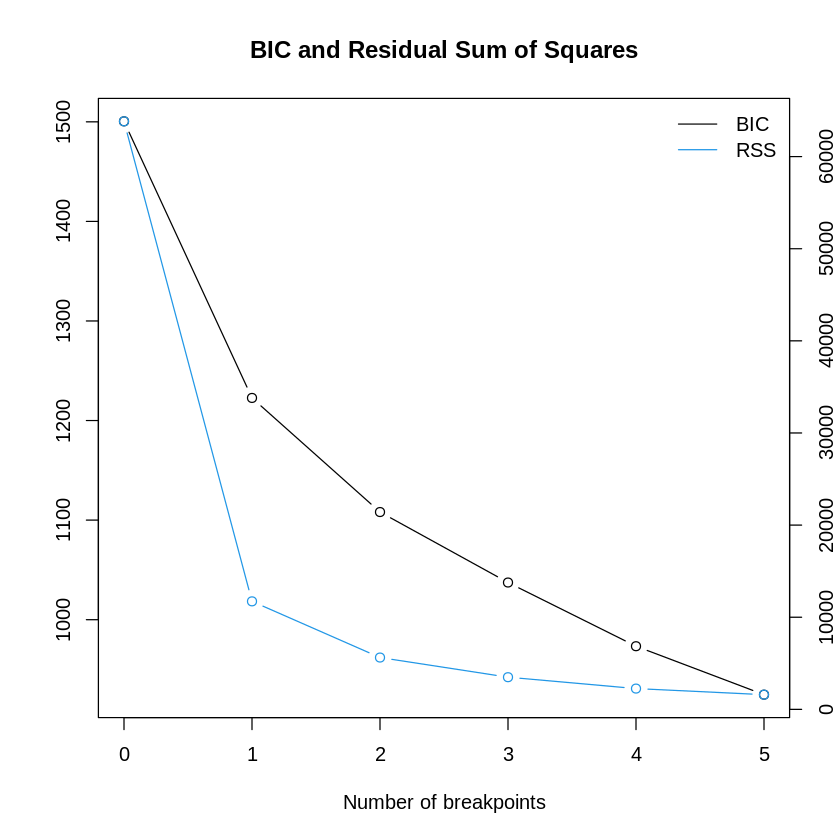

In [65]:
prod_bp <- breakpoints(prod ~ 1, data = data, breaks = 5)
summary(prod_bp)
plot(prod_bp, breaks = 5)

Since the BIC curve's minimum point is at 5, the test identified 5 structural breaks.

In [66]:
data %>%
  slice(prod_bp$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9846.293,52.17628,9.7266667,56.652,5.233333,1989 Q2,0.03333333,0.283333333,74.568,0.8438200,0.277,0.16666667,-0.6900000
12037.775,66.87284,5.2800000,64.200,5.333333,1996 Q4,0.06666667,-0.026666667,123.712,0.4781667,0.094,0.30000000,-0.0900000
14614.141,77.20965,1.2500000,78.561,5.866667,2003 Q1,0.00000000,-0.193333333,76.561,0.7735067,0.750,-0.13333333,0.1033333
16269.145,90.39984,0.1800000,91.033,9.300000,2009 Q2,1.03333333,-0.003333333,-29.117,0.9484567,1.975,-0.36666667,0.3200000
19197.938,101.66710,0.3966667,98.570,4.900000,2016 Q3,-0.03333333,0.023333333,135.229,0.3370667,0.379,-0.06666667,0.0100000


The dates of the breakpoints can be seen in the "date" column of the table above.

*CUSUM Statistics*

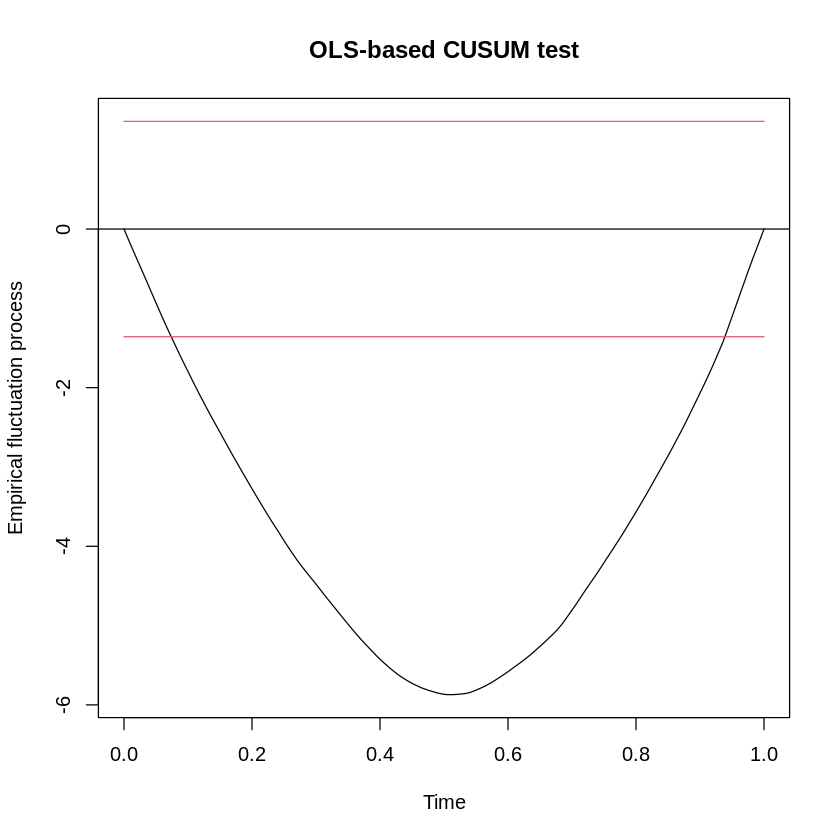

In [67]:
prod_cusum <- efp(prod ~ 1, data = data, type = "OLS-CUSUM")
plot(prod_cusum)

There is a structural break in the prod time series (the curve intersects with the lines shown in red).

In [68]:
data %>%
  slice(prod_cusum$datatsp)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.850000,-8.546,0.6328667,0.060,-0.7000000,-0.49000000
21989.981,125.52120,3.653333,108.961,3.566667,2022 Q4,0.03333333,1.463333,138.847,0.4591333,0.661,0.1333333,0.04333333


The breakpoints are in the third quarter of 1980 and the fourth quarter of 2022.

**Structural Break Analysis - unemp**

*QLR Statistics*


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = unemp_qlr)

Breakpoints at observation number:
25 

Corresponding to breakdates:
0.1411765 


	supF test

data:  unemp_qlr
sup.F = 43.821, p-value = 1.802e-09


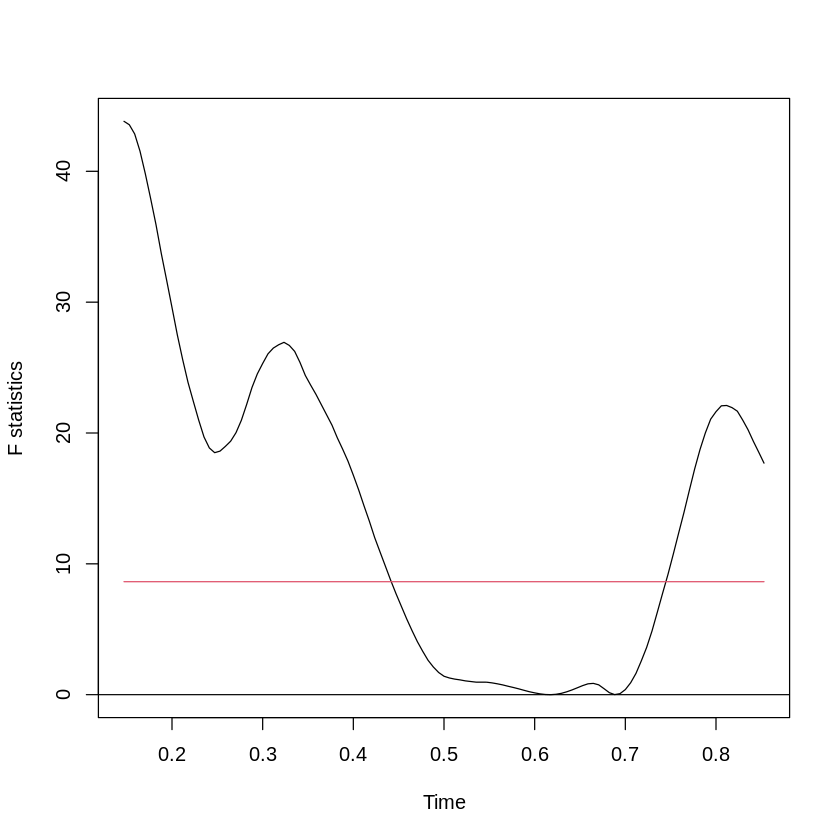

In [69]:
unemp_qlr <- Fstats(unemp ~ 1, data = data)
breakpoints(unemp_qlr)
sctest(unemp_qlr, type = "supF")
plot(unemp_qlr)

The p-value is much smaller than 0.05, so we reject the null hypothesis, indicating that there is a structural break in the unemp time series.

In [70]:
data %>%
  slice(unemp_qlr$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8872.601,46.32579,6.206667,55.201,6.966667,1986 Q3,-0.2,-0.7133333,84.077,0.33753,0.286,-0.3333333,0.1933333


The break occurred in the third quarter of 1986.

*BP Statistics*


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = unemp ~ 1, breaks = 5, data = data)

Breakpoints at observation number:
                        
m = 1   25              
m = 2            112 137
m = 3   26       112 137
m = 4   25 57    112 137
m = 5   25 61 86 112 137

Corresponding to breakdates:
                                                                               
m = 1   0.147058823529412                                                      
m = 2                                                         0.658823529411765
m = 3   0.152941176470588                                     0.658823529411765
m = 4   0.147058823529412 0.335294117647059                   0.658823529411765
m = 5   0.147058823529412 0.358823529411765 0.505882352941176 0.658823529411765
                         
m = 1                    
m = 2   0.805882352941176
m = 3   0.805882352941176
m = 4   0.805882352941176
m = 5   0.805882352941176

Fit:
                                

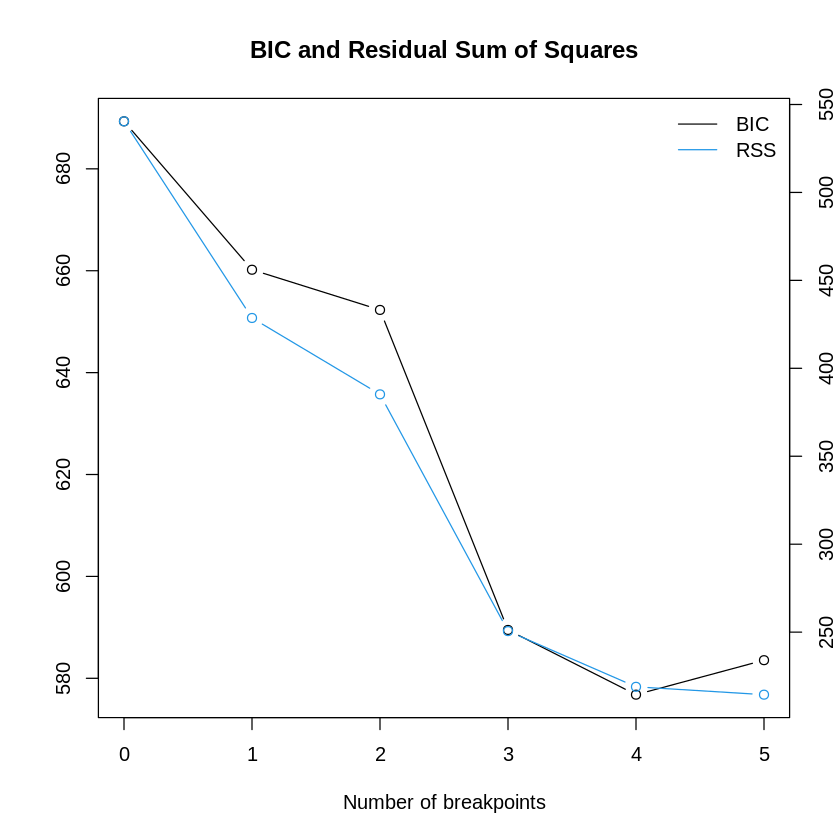

In [71]:
unemp_bp <- breakpoints(unemp ~ 1, data = data, breaks = 5)
summary(unemp_bp)
plot(unemp_bp, breaks = 5)

Since the BIC curve has its minimum point at 4, the test identified 4 structural breaks.

In [72]:
data %>%
  slice(unemp_bp$breakpoint)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8872.601,46.32579,6.206667,55.201,6.966667,1986 Q3,-0.2000000,-0.713333333,84.077,0.3375300,0.286,-0.3333333,0.19333333
11152.176,62.83656,4.486667,61.569,6.000000,1994 Q3,-0.2000000,0.546666667,64.815,0.5484833,-0.316,0.1666667,-0.18000000
16943.291,91.45195,2.086667,88.247,5.333333,2008 Q2,0.3333333,-1.090000000,100.288,1.9645567,0.983,0.1333333,0.23000000
18406.941,100.43343,0.090000,97.399,6.066667,2014 Q3,-0.1333333,-0.003333333,221.030,0.1150333,0.646,0.3333333,-0.02333333


The occurrence dates of the breakpoints can be seen in the "date" column of the table above.

*CUSUM Statistics*

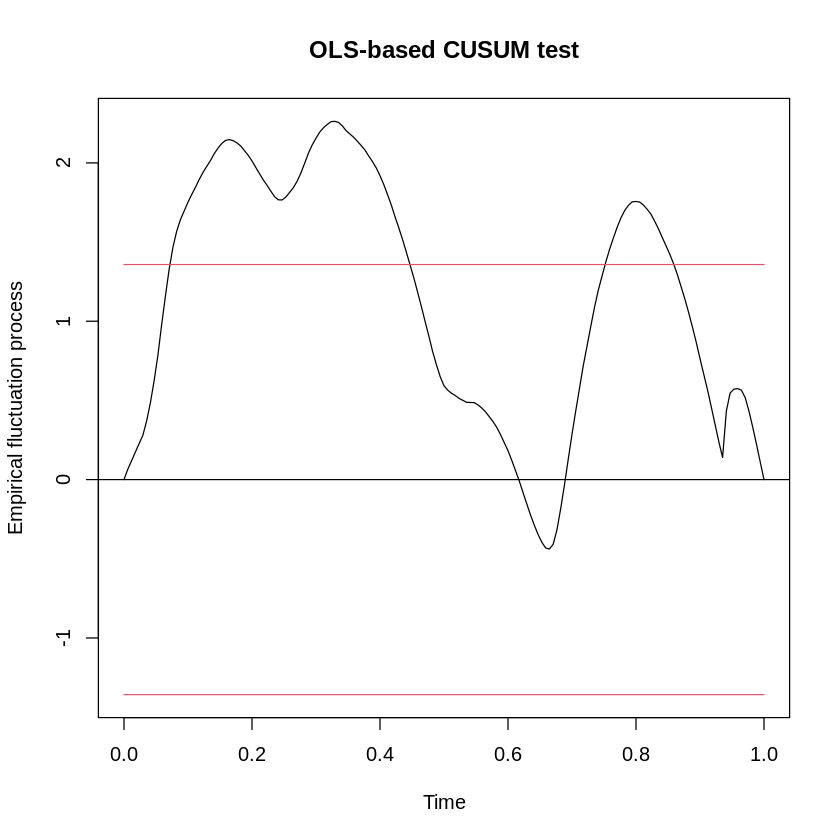

In [73]:
unemp_cusum <- efp(unemp~ 1, data = data, type = "OLS-CUSUM")
plot(unemp_cusum)

There is a structural break in the unemployment series (the curve intersects the red lines).

In [74]:
data %>%
  slice(unemp_cusum$datatsp)

rgdp,inf,int,prod,unemp,date,ln_unemp,ln_int,dif_rgdp,dif_inf,dif_prod,dif_unemp,dif_int
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7181.743,35.15922,9.836667,48.147,7.666667,1980 Q3,0.33333333,-2.850000,-8.546,0.6328667,0.060,-0.7000000,-0.49000000
21989.981,125.52120,3.653333,108.961,3.566667,2022 Q4,0.03333333,1.463333,138.847,0.4591333,0.661,0.1333333,0.04333333


The breakpoints are in the third quarter of 1980 and the fourth quarter of 2022.

###**Stationarity Examination**

Since the QLR test indicates the presence of structural breaks in the time series, we used the Zivot-Andrews (ZA) test to measure stationarity.

H0: The time series is non-stationary and has a unit root.

H1: The time series is stationary and does not have a unit root.

If the absolute value of the test statistic is greater than the critical value at the 0.05 significance level, we can reject the null hypothesis; otherwise, we must retain it.

**Stationarity - rgdp and dif_rgdp**

In [75]:
rgdp_za <- ur.za(data$rgdp, model = 'both',lag = 2)
summary(rgdp_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1806.12   -62.82    19.82    70.87   772.25 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1341.04341  290.27251   4.620 7.85e-06 ***
y.l1           0.79890    0.04590  17.406  < 2e-16 ***
trend         18.97707    4.23991   4.476 1.44e-05 ***
y.dl1         -0.12176    0.07724  -1.576 0.116894    
y.dl2         -0.03542    0.07569  -0.468 0.640489    
du          -252.61007   69.70742  -3.624 0.000389 ***
dt             3.75488    1.62423   2.312 0.022064 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182.4 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9982 
F-statistic: 1.522e+04 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -4

The obtained test statistic value is smaller in absolute terms than the critical value, so we cannot reject the null hypothesis. Therefore, the rgdp time series is non-stationary and has a unit root.

In [76]:
dif_rgdp_za <- ur.za(data$dif_rgdp, model = 'both',lag = 2)
summary(dif_rgdp_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1795.68   -35.04    18.47    68.13   894.68 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 112.53799   34.16148   3.294  0.00121 **
y.l1         -0.48271    0.16693  -2.892  0.00437 **
trend         0.11225    0.33032   0.340  0.73443   
y.dl1         0.23798    0.12880   1.848  0.06648 . 
y.dl2         0.03668    0.07802   0.470  0.63886   
du          453.63378  175.95840   2.578  0.01084 * 
dt          -69.65977   32.56946  -2.139  0.03397 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 190.7 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.08143,	Adjusted R-squared:  0.04698 
F-statistic: 2.364 on 6 and 160 DF,  p-value: 0.03246


Teststatistic: -8.8821 
Critical valu

The obtained test statistic value is greater in absolute terms than the critical value, so we can reject the null hypothesis. Therefore, the dif_rgdp time series is stationary and does not have a unit root.

**Stationarity - inf and dif_inf**

In [77]:
inf_za <- ur.za(data$inf, model = 'both',lag = 2)
summary(inf_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07496 -0.18605 -0.01652  0.17702  1.69979 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.92595    1.25005   3.941 0.000121 ***
y.l1         0.87716    0.03561  24.635  < 2e-16 ***
trend        0.05655    0.01652   3.424 0.000784 ***
y.dl1        0.25837    0.07234   3.572 0.000469 ***
y.dl2       -0.42002    0.07612  -5.518 1.36e-07 ***
du          -0.83169    0.33944  -2.450 0.015355 *  
dt           0.39472    0.06228   6.338 2.27e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4485 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 7.2e+04 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -3.4498 
Critical v

The obtained test statistic value is smaller in absolute terms than the critical value, so we cannot reject the null hypothesis. Therefore, the inf time series is not stationary and has a unit root.

In [78]:
dif_inf_za <- ur.za(data$dif_inf, model = 'both',lag = 2)
summary(dif_inf_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5821 -0.1678  0.0053  0.1858  1.4652 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.4962341  0.1023935   4.846 2.95e-06 ***
y.l1        -0.0340198  0.1337863  -0.254 0.799602    
trend       -0.0002057  0.0008445  -0.244 0.807924    
y.dl1        0.3355994  0.0959283   3.498 0.000606 ***
y.dl2       -0.1762897  0.0811062  -2.174 0.031208 *  
du          -0.5670939  0.2853760  -1.987 0.048609 *  
dt           0.1889932  0.0395906   4.774 4.05e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.46 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.4314,	Adjusted R-squared:   0.41 
F-statistic: 20.23 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -7.7289 
Critical 

The obtained test statistic value is larger in absolute terms than the critical value, so we can reject the null hypothesis. Therefore, the dif_inf time series is stationary and does not have a unit root.

**Stationarity - int and dif_int**

In [79]:
int_za <- ur.za(data$int, model = 'both',lag = 2)
summary(int_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.94415 -0.19034  0.03738  0.23227  2.62818 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.126740   0.311208   3.621 0.000394 ***
y.l1         0.876525   0.026385  33.220  < 2e-16 ***
trend       -0.007924   0.002790  -2.840 0.005097 ** 
y.dl1        0.341497   0.074106   4.608 8.25e-06 ***
y.dl2        0.094768   0.062899   1.507 0.133869    
du          -0.352696   0.193412  -1.824 0.070086 .  
dt           0.015692   0.005567   2.819 0.005434 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5767 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.9765,	Adjusted R-squared:  0.9756 
F-statistic:  1109 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -4.6797 
Crit

The obtained test statistic value is smaller in absolute terms than the critical value, so we cannot reject the null hypothesis. Therefore, the int time series is not stationary and has a unit root.

In [80]:
dif_int_za <- ur.za(data$dif_int, model = 'both',lag = 2)
summary(dif_int_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.70741 -0.15062 -0.00171  0.22122  2.06315 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.80964    2.61423   5.665 6.67e-08 ***
y.l1        -1.09416    0.15086  -7.253 1.66e-11 ***
trend       -3.34024    0.50558  -6.607 5.54e-10 ***
y.dl1        0.58022    0.10900   5.323 3.40e-07 ***
y.dl2        0.12920    0.05474   2.360   0.0195 *  
du           5.27897    0.55896   9.444  < 2e-16 ***
dt           3.34011    0.50561   6.606 5.56e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.545 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.4713,	Adjusted R-squared:  0.4514 
F-statistic: 23.77 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -13.8812 
Critical val

The obtained test statistic value is greater in absolute terms than the critical value, so we can reject the null hypothesis. Therefore, the dif_int time series is stationary and does not have a unit root.

**Stationarity - prod and dif_prod**

In [81]:
prod_za <- ur.za(data$prod, model = 'both',lag = 2)
summary(prod_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7906 -0.3245 -0.0204  0.2591  4.2922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.568658   1.566608   3.555 0.000498 ***
y.l1        0.883368   0.033371  26.471  < 2e-16 ***
trend       0.035733   0.009653   3.702 0.000294 ***
y.dl1       0.133219   0.077638   1.716 0.088113 .  
y.dl2       0.046404   0.078087   0.594 0.553175    
du          0.870845   0.279651   3.114 0.002187 ** 
dt          0.005886   0.005566   1.057 0.291920    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6082 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 2.765e+04 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -3.495 
Critical values: 0.01

The obtained test statistic value is smaller in absolute terms than the critical value, so we cannot reject the null hypothesis. Therefore, the prod time series is not stationary and has a unit root.

In [82]:
dif_prod_za <- ur.za(data$dif_prod, model = 'both',lag = 2)
summary(dif_prod_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74834 -0.34869 -0.00863  0.26501  2.68847 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.305079   0.105112   2.902  0.00423 ** 
y.l1        -0.158264   0.141919  -1.115  0.26645    
trend        0.001294   0.001058   1.223  0.22310    
y.dl1        0.118932   0.111536   1.066  0.28789    
y.dl2       -0.022740   0.077957  -0.292  0.77089    
du           1.920233   0.450736   4.260 3.47e-05 ***
dt          -0.332973   0.067583  -4.927 2.07e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5895 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1615,	Adjusted R-squared:  0.1301 
F-statistic: 5.137 on 6 and 160 DF,  p-value: 7.455e-05


Teststatistic: -8.1615 
Crit

The obtained test statistic value is greater in absolute terms than the critical value, so we can reject the null hypothesis. Therefore, the dif_prod time series is stationary and does not have a unit root.

**Stationarity - unemp and dif_unemp**

In [83]:
unemp_za <- ur.za(data$unemp, model = 'both',lag = 2)
summary(unemp_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8635 -0.3021 -0.1023  0.1208  9.1127 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.789475   0.453264   3.948 0.000118 ***
y.l1         0.772851   0.052288  14.781  < 2e-16 ***
trend       -0.007522   0.003072  -2.448 0.015434 *  
y.dl1       -0.031403   0.078908  -0.398 0.691185    
y.dl2       -0.007683   0.077111  -0.100 0.920753    
du           1.233699   0.354453   3.481 0.000645 ***
dt          -0.018493   0.007236  -2.556 0.011534 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.813 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.8023,	Adjusted R-squared:  0.7949 
F-statistic: 108.2 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -4.3442 
Critical values

The obtained test statistic value is smaller in absolute terms than the critical value, so we cannot reject the null hypothesis. Therefore, the unemp time series is not stationary and has a unit root.

In [84]:
dif_unemp_za <- ur.za(data$dif_unemp, model = 'both',lag = 2)
summary(dif_unemp_za)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8226 -0.2071 -0.0515  0.0964  8.9707 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.136869   0.136243  -1.005    0.317    
y.l1        -1.773991   0.170855 -10.383  < 2e-16 ***
trend        0.002372   0.001454   1.631    0.105    
y.dl1        0.913719   0.125435   7.284 1.39e-11 ***
y.dl2        0.292519   0.063868   4.580 9.30e-06 ***
du          -4.556207   0.579152  -7.867 5.11e-13 ***
dt           0.606991   0.090943   6.674 3.86e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8257 on 160 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.6028,	Adjusted R-squared:  0.5879 
F-statistic: 40.47 on 6 and 160 DF,  p-value: < 2.2e-16


Teststatistic: -16.236 
Critical value

The obtained test statistic value is larger in absolute terms than the critical value, so we can reject the null hypothesis. Therefore, the dif_unemp time series is stationary and does not have a unit root.

###**ARDL Modeling**

In [85]:
install.packages("lmtest")
install.packages("dynamac")
install.packages("ARDL")
install.packages("dLagM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘expm’, ‘aod’, ‘dynlm’, ‘msm’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Formula’, ‘gtools’, ‘operator.tools’, ‘RcppParallel’, ‘nardl’, ‘AER’, ‘formula.tools’, ‘plyr’, ‘wavethresh’, ‘roll’




In [86]:
library(lmtest)
library(dynamac)
library(ARDL)
library(dLagM)

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.4.
  https://CRAN.R-project.org/package=ARDL

Loading required package: nardl


Attaching package: ‘nardl’


The following object is masked from ‘package:dynamac’:

    pssbounds


Loading required package: dynlm


Attaching package: ‘dLagM’


The following object is masked from ‘package:aTSA’:

    forecast


The following objects are masked from ‘package:fabletools’:

    forecast, MAPE, MASE




The first task after examining stationarity is determining the integration order of the dimensions.

Each variable has an integration order of I(1), as it required differencing once to make the time series stationary.

**Determining the number of lags**

*AIC Criterion*

In [87]:
modell1 <- auto_ardl(dif_unemp ~ dif_rgdp + dif_inf + dif_int + dif_prod, data=data, max_order = 3, grid = TRUE)
summary(modell1)

           Length Class      Mode   
best_model 19     dynlm      list   
best_order  5     -none-     numeric
top_orders  6     data.frame list   

In [88]:
modell1$top_orders

dif_unemp,dif_rgdp,dif_inf,dif_int,dif_prod,AIC
<int>,<int>,<int>,<int>,<int>,<dbl>
3,3,0,0,2,-21.80234
3,3,1,0,2,-21.10418
3,3,0,0,3,-20.66214
3,3,0,1,2,-20.27605
3,3,1,0,3,-20.06640
3,3,1,1,2,-19.61296
3,3,2,0,2,-19.36948
3,3,0,2,2,-19.25259
3,3,0,1,3,-19.18539


In [89]:
modell1$best_order

dif_unemp  dif_rgdp   dif_inf   dif_int  dif_prod 
        3         3         0         0         2

In [90]:
modell1$best_model


Time series regression with "ts" data:
Start = 4, End = 170

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Coefficients:
    (Intercept)  L(dif_unemp, 1)  L(dif_unemp, 2)  L(dif_unemp, 3)  
     -0.0150783       -0.6212023       -0.2042992       -0.0569137  
       dif_rgdp   L(dif_rgdp, 1)   L(dif_rgdp, 2)   L(dif_rgdp, 3)  
     -0.0039119        0.0010483        0.0017003        0.0007237  
        dif_inf          dif_int         dif_prod   L(dif_prod, 1)  
      0.0483535       -0.0546517        0.5121898       -0.1743299  
 L(dif_prod, 2)  
     -0.2568728  


*The equation for the **ARDL(3,3,3,0,0)** model is:*

dif_unemp(t)=−0.0092−0.6996⋅dif_unemp(t−1)−0.3035⋅dif_unemp(t−2)−0.0442⋅dif_unemp(t−3)−0.0038⋅dif_rgdp(t)+0.0007⋅dif_rgdp(t−1)+0.0016⋅dif_rgdp(t−2)+0.0010⋅dif_rgdp(t−3)+0.0525⋅dif_inf(t)−0.0488⋅dif_int(t)+0.4996⋅dif_prod(t)−0.1236⋅dif_prod(t−1)−0.2414⋅dif_prod(t−2)−0.0854⋅dif_prod(t−3)+ϵ(t)

*BIC Criterium*

In [91]:
modell2 <- auto_ardl(dif_unemp ~ dif_rgdp + dif_inf + dif_int + dif_prod, data=data, max_order = 3, grid = TRUE, selection = 'BIC')
summary(modell2)

           Length Class      Mode   
best_model 19     dynlm      list   
best_order  5     -none-     numeric
top_orders  6     data.frame list   

In [92]:
modell2$top_orders

dif_unemp,dif_rgdp,dif_inf,dif_int,dif_prod,BIC
<int>,<int>,<int>,<int>,<int>,<dbl>
3,3,0,0,2,21.84957
2,3,0,0,2,22.77055
3,3,1,0,2,25.66573
3,3,0,0,3,26.10777
2,3,0,0,3,26.42927
3,3,0,1,2,26.49385
3,2,0,0,2,26.72895
2,3,1,0,2,27.01941
2,3,0,1,2,27.22867


In [93]:
modell2$best_order

dif_unemp  dif_rgdp   dif_inf   dif_int  dif_prod 
        3         3         0         0         2

The model is ARDL(2,3,0,2).

In [94]:
modell3 <- modell2$best_model
summary(modell3)


Time series regression with "ts" data:
Start = 4, End = 170

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93148 -0.12238 -0.00027  0.15307  0.52724 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.0150783  0.0387835  -0.389 0.697975    
L(dif_unemp, 1) -0.6212023  0.0653628  -9.504  < 2e-16 ***
L(dif_unemp, 2) -0.2042992  0.0440029  -4.643 7.31e-06 ***
L(dif_unemp, 3) -0.0569137  0.0238999  -2.381 0.018471 *  
dif_rgdp        -0.0039119  0.0001021 -38.313  < 2e-16 ***
L(dif_rgdp, 1)   0.0010483  0.0002903   3.612 0.000411 ***
L(dif_rgdp, 2)   0.0017003  0.0002907   5.849 2.87e-08 ***
L(dif_rgdp, 3)   0.0007237  0.0002348   3.082 0.002434 ** 
dif_inf          0.0483535  0.0310363   1.558 0.121295    
dif_int         -0.0546517  0.0235976  -2.316 0.021878 *  
dif_prod         0.5121898  0.0308879  16.582  < 2e-16 ***
L(dif_prod, 1)  -0.17432

Where the p-value is greater than the chosen significance level (0.05), those variables can be excluded from the model.

We can remove dif_inf and dif_int from the equation, leaving only three variables in the model: **ARDL(2,3,2)**.

We will re-estimate the model with only the remaining variables.

In [95]:
modellARDL <- ardl(dif_unemp ~ dif_rgdp + dif_prod, data=data, order=c(2,3,2))
summary(modellARDL)


Time series regression with "ts" data:
Start = 4, End = 170

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95910 -0.10956 -0.00327  0.14554  0.68342 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.0256946  0.0341850  -0.752 0.453397    
L(dif_unemp, 1) -0.6220954  0.0669564  -9.291  < 2e-16 ***
L(dif_unemp, 2) -0.2269877  0.0446334  -5.086 1.03e-06 ***
dif_rgdp        -0.0038986  0.0001010 -38.583  < 2e-16 ***
L(dif_rgdp, 1)   0.0010861  0.0002973   3.653 0.000353 ***
L(dif_rgdp, 2)   0.0016033  0.0002964   5.409 2.32e-07 ***
L(dif_rgdp, 3)   0.0011481  0.0001883   6.097 8.07e-09 ***
dif_prod         0.5035566  0.0311988  16.140  < 2e-16 ***
L(dif_prod, 1)  -0.1703882  0.0459525  -3.708 0.000289 ***
L(dif_prod, 2)  -0.2427603  0.0453345  -5.355 2.99e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standa

*The equation for the **ARDL(2,3,2)** model is:*

dif_unemp(t)=−0.0163−0.6273×dif_unemp(t−1)−0.2256×dif_unemp(t−2)−0.0038×dif_rgdp(t)+0.0010×dif_rgdp(t−1)+0.0016×dif_rgdp(t−2)+0.0010×dif_rgdp(t−3)+0.4896×dif_prod(t)−0.1581×dif_prod(t−1)−0.2487×dif_prod(t−2)+ϵ(t)

In [96]:
library(knitr)

In [97]:
kable(tidy(modellARDL), caption="Parameters of the ARDL Model")

Warning message:
“The `tidy()` method for objects of class `dynlm` is not maintained by the broom team, and is only supported through the `lm` tidier method. Please be cautious in interpreting and reporting broom output.

This warning is displayed once per session.”




Table: Parameters of the ARDL Model

|term            |   estimate| std.error|  statistic|   p.value|
|:---------------|----------:|---------:|----------:|---------:|
|(Intercept)     | -0.0256946| 0.0341850|  -0.751633| 0.4533971|
|L(dif_unemp, 1) | -0.6220954| 0.0669564|  -9.291049| 0.0000000|
|L(dif_unemp, 2) | -0.2269877| 0.0446334|  -5.085606| 0.0000010|
|dif_rgdp        | -0.0038986| 0.0001010| -38.583218| 0.0000000|
|L(dif_rgdp, 1)  |  0.0010861| 0.0002973|   3.653037| 0.0003527|
|L(dif_rgdp, 2)  |  0.0016033| 0.0002964|   5.408749| 0.0000002|
|L(dif_rgdp, 3)  |  0.0011481| 0.0001883|   6.096998| 0.0000000|
|dif_prod        |  0.5035566| 0.0311988|  16.140231| 0.0000000|
|L(dif_prod, 1)  | -0.1703882| 0.0459525|  -3.707922| 0.0002894|
|L(dif_prod, 2)  | -0.2427603| 0.0453345|  -5.354870| 0.0000003|

**Az ARDL modell hibakorrekciós alakja (UECM)**

In [98]:
uecm <- uecm(modellARDL)
summary(uecm)


Time series regression with "ts" data:
Start = 4, End = 170

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95910 -0.10956 -0.00327  0.14554  0.68342 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.569e-02  3.419e-02  -0.752   0.4534    
L(dif_unemp, 1)    -1.849e+00  8.885e-02 -20.810  < 2e-16 ***
L(dif_rgdp, 1)     -6.111e-05  2.342e-04  -0.261   0.7945    
L(dif_prod, 1)      9.041e-02  4.925e-02   1.836   0.0683 .  
d(L(dif_unemp, 1))  2.270e-01  4.463e-02   5.086 1.03e-06 ***
d(dif_rgdp)        -3.899e-03  1.010e-04 -38.583  < 2e-16 ***
d(L(dif_rgdp, 1))  -2.751e-03  3.019e-04  -9.114 3.57e-16 ***
d(L(dif_rgdp, 2))  -1.148e-03  1.883e-04  -6.097 8.07e-09 ***
d(dif_prod)         5.036e-01  3.120e-02  16.140  < 2e-16 ***
d(L(dif_prod, 1))   2.428e-01  4.533e-02   5.355 2.99e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

The equation for the **UECM** model is:

Δy(t)=−0.0163−1.8530⋅y(t−1)−0.0001⋅x1(t−1)+0.0827⋅x2(t−1)+0.2256⋅Δy(t−1)−0.0038⋅Δx1(t)−0.0026⋅Δx1(t−1)−0.0010⋅Δx1(t−2)+0.4896⋅Δx2(t)+0.2487⋅Δx2(t−1)+u(t)

**Interval Boundary Tests**

Cointegration signifies a long-term relationship between variables, meaning that they move together over time despite experiencing short-term fluctuations.








***Bounds Test***

H0: There is no long-term cointegrating relationship.

H1: There is a long-term cointegrating relationship.


In [99]:
tbounds <- bounds_t_test(uecm , case = 3, alpha = 0.01)
tbounds


	Bounds t-test for no cointegration

data:  d(dif_unemp) ~ L(dif_unemp, 1) + L(dif_rgdp, 1) + L(dif_prod,     1) + d(L(dif_unemp, 1)) + d(dif_rgdp) + d(L(dif_rgdp, 1)) +     d(L(dif_rgdp, 2)) + d(dif_prod) + d(L(dif_prod, 1))
t = -20.81, Lower-bound I(0) = -3.4250, Upper-bound I(1) = -4.0972,
p-value = 1e-06
alternative hypothesis: Possible cointegration
null values:
   k    T 
   2 1000 


In [100]:
fbounds <- bounds_f_test(uecm, case = 3)
fbounds


	Bounds F-test (Wald) for no cointegration

data:  d(dif_unemp) ~ L(dif_unemp, 1) + L(dif_rgdp, 1) + L(dif_prod,     1) + d(L(dif_unemp, 1)) + d(dif_rgdp) + d(L(dif_rgdp, 1)) +     d(L(dif_rgdp, 2)) + d(dif_prod) + d(L(dif_prod, 1))
F = 146.5, p-value = 1e-06
alternative hypothesis: Possible cointegration
null values:
   k    T 
   2 1000 


Since the t-statistic value falls outside the lower and upper bounds, we can reject the null hypothesis and accept the alternative hypothesis, indicating that there is a cointegrating relationship between the variables.

Additionally, the p-value of the F-statistic is less than 0.05, which also indicates the presence of cointegration.

***RECM Model***

In [101]:
recm <- recm(uecm, case=3)
summary(recm)


Time series regression with "zooreg" data:
Start = 4, End = 170

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95910 -0.10956 -0.00327  0.14554  0.68342 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.569e-02  1.721e-02  -1.493    0.137    
d(L(dif_unemp, 1))  2.270e-01  4.244e-02   5.348 3.05e-07 ***
d(dif_rgdp)        -3.899e-03  8.575e-05 -45.466  < 2e-16 ***
d(L(dif_rgdp, 1))  -2.751e-03  2.721e-04 -10.112  < 2e-16 ***
d(L(dif_rgdp, 2))  -1.148e-03  1.802e-04  -6.371 1.94e-09 ***
d(dif_prod)         5.036e-01  2.643e-02  19.054  < 2e-16 ***
d(L(dif_prod, 1))   2.428e-01  3.943e-02   6.156 5.85e-09 ***
ect                -1.849e+00  8.765e-02 -21.097  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2217 on 159 degrees of freedom
  (0 observations deleted due to missingness

Significant (the p-value for the ECT is less than 0.05), indicating that there is a long-term effect. Additionally, the coefficient is negative, which reflects the speed of adjustment towards long-term equilibrium.

Δy(t)=−1.853⋅ECT(t−1)+u(t)

**Model Diagnostics Tests**

***Ramsey RESET Test***

With this test, we evaluate the model specification.

H0: The model specification is correct.

H1: The model specification is incorrect.

In [102]:
library(lmtest)

In [103]:
resettest(modellARDL)


	RESET test

data:  modellARDL
RESET = 33.979, df1 = 2, df2 = 155, p-value = 5.798e-13


The p-value is less than 0.05, so we reject the null hypothesis. This indicates that the model specification is incorrect.

At this point, either the ARDL model needs to be re-specified, or an alternative model should be chosen for forecasting.

***The ARDL model is also inadequate because the variables are of the same order.***

### **VAR or VECM?**

Based on the previous tests, we know that the original time series are not stationary, only their once-differenced versions are. Therefore, we need to conduct cointegration tests to determine whether we should estimate a VAR model with the differenced time series or a VECM model if cointegration is present.








The order of integration for each variable is **I(1)**.

**Selecting the Order of the VAR(P) Model**

In [104]:
vardata <- data[,c('unemp', 'rgdp', 'inf', 'int', 'prod')]

In [105]:
lagselect <- VARselect(vardata, lag.max = 5, type = 'trend')
lagselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     4      2      2      4

Optimal lag: lagselect$selection - 1, so 4 - 1 = 3

**Cointegration Testing - Johansen Test - Trace Test**

*If the number of cointegration relationships is 0:*

H0: There is no cointegration.

H1: There is more than 0 cointegration relationships.


*If the number of cointegration relationships is 1:*

H0: There is at most 1 cointegration relationship.

H1: There is more than 1 cointegration relationship.


*If the number of cointegration relationships is 2:*

H0: There is at most 2 cointegration relationships.

H1: There is more than 2 cointegration relationships.


And so on.

In [106]:
koint_t <- ca.jo(vardata, type = "trace", ecdet = "trend", K = 4, spec = "transitory")
summary(koint_t)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 2.317585e-01 1.478985e-01 8.851145e-02 6.028403e-02 3.081863e-02
[6] 3.768512e-17

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 4 |   5.20 10.49 12.25 16.26
r <= 3 |  15.52 22.76 25.32 30.45
r <= 2 |  30.90 39.06 42.44 48.45
r <= 1 |  57.47 59.14 62.99 70.05
r = 0  | 101.24 83.20 87.31 96.58

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             unemp.l1      rgdp.l1      inf.l1       int.l1      prod.l1
unemp.l1  1.000000000  1.000000000  1.00000000   1.00000000  1.000000000
rgdp.l1   0.004981187 -0.002082444  0.00328223  -0.03939908  0.001133463
inf.l1   -0.128711154 -0.614509394 -0.18336007 -12.61860744 -0.927773585
int.l1   -0.793325388 -0.392960952  0.04924735   4.13016705  0.315176492
prod.l1  -0.706718856  0.013920920 -0.545960


r = 0: The test statistic value is greater than the 5% critical value, so we accept the alternative hypothesis, indicating that there is more than 0 cointegration relationship.

r = 1: The test statistic value is smaller than the 5% critical value, so we cannot reject the null hypothesis, indicating that there is at most 1 cointegration relationship.


Based on this, we can conclude that there is exactly 1 cointegration relationship among the time series.

Since there is a cointegration relationship, we will use a **VECM** for forecasting, taking into account the long-term relationship as well.

### **VECM Modeling**

In [107]:
install.packages('tsDyn')
library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deSolve’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:dLagM’:

    MAPE


The following object is masked from ‘package:fabletools’:

    MAPE




We need to specify the number of cointegration relationships (r = 1), as determined in the previous step, and the number of lags (3).

In [108]:
modelVECM <- tsDyn::VECM(vardata, 3, r = 1, estim = "ML")
summary(modelVECM)

#############
###Model VECM 
#############
Full sample size: 170 	End sample size: 166
Number of variables: 5 	Number of estimated slope parameters 85
AIC 575.987 	BIC 852.9539 	SSR 4353091
Cointegrating vector (estimated by ML):
   unemp        rgdp        inf        int       prod
r1     1 0.004298898 -0.2882033 -0.6988964 -0.6865166


               ECT                  Intercept              unemp -1            
Equation unemp -0.0427(0.0486)      -0.2268(0.5426)        -1.5060(0.3201)***  
Equation rgdp  10.9384(10.6100)     165.3460(118.3536)     343.3801(69.8117)***
Equation inf   -0.0288(0.0301)      -0.2260(0.3363)        0.0074(0.1984)      
Equation int   0.1983(0.0346)***    2.0367(0.3862)***      -0.0165(0.2278)     
Equation prod  0.0601(0.0352).      1.3151(0.3928)**       -0.4095(0.2317).    
               rgdp -1              inf -1               int -1             
Equation unemp -0.0060(0.0013)***   0.0111(0.1320)       -0.2229(0.1073)*   
Equation rgdp  1.1351(0.28

***The equation:***

r1=unemp(t)+0.0042×rgdp(t)−0.2875×inf(t)−0.7038×int(t)−0.6763×prod(t)

The negative signs indicate a long-term relationship between the given variable and unemployment.

The ECT describes the short-term dynamics of the system, indicating how quickly the variables adjust to changes and return to their long-term equilibrium.

**Unemp Equation:** The **ECT has a negative coefficient** – unemployment (unemp) adjusts upwards if it falls below the long-term equilibrium level and adjusts downwards if it rises above the long-term equilibrium level.

**RGDP Equation:** The **ECT has a positive coefficient** – real GDP (rgdp) adjusts upwards when it deviates from the long-term equilibrium.

**Inf Equation:** The **ECT has a negative coefficient** – inflation (inf) adjusts upwards if it falls below the long-term equilibrium level and adjusts downwards if it rises above the long-term equilibrium level.

**Int Equation:** The **ECT has a positive coefficient** – the interest rate (int) adjusts upwards when it deviates from the long-term equilibrium.

**Prod Equation:** The **ECT has a positive coefficient** – productivity (prod) adjusts upwards when it deviates from the long-term equilibrium.

**Δunemp(t)**=−0.0489⋅ECT(t−1)−0.2962−1.5254⋅unemp(t−1)−0.0061⋅rgdp(t−1)+0.0174⋅inf(t−1)−0.2271⋅int(t−1)+0.3671⋅prod(t−1)+0.3482⋅unemp(t−2)+0.0009⋅rgdp(t−2)−0.0946⋅inf(t−2)−0.0604⋅int(t−2)−0.1025⋅prod(t−2)+0.6263⋅unemp(t−3)+0.0031⋅rgdp(t−3)−0.0507⋅inf(t−3)−0.0225⋅int(t−3)−0.3819⋅prod(t−3)

**Δrgdp(t)**=12.0056⋅ECT(t−1)+177.8284+345.4536⋅unemp(t−1)+1.1404⋅rgdp(t−1)−8.3745⋅inf(t−1)+56.8658⋅int(t−1)−71.3676⋅prod(t−1)−62.3818⋅unemp(t−2)−0.1622⋅rgdp(t−2)+25.0369⋅inf(t−2)+19.9037⋅int(t−2)+11.1579⋅prod(t−2)−102.4128⋅unemp(t−3)−0.5188⋅rgdp(t−3)−16.0928⋅inf(t−3)+9.1578⋅int(t−3)+88.6211⋅prod(t−3)

**Δinf(t)**=−0.0293⋅ECT(t−1)−0.2328+0.0043⋅unemp(t−1)−0.0003⋅rgdp(t−1)+0.6322⋅inf(t−1)+0.0106⋅int(t−1)+0.1103⋅prod(t−1)+0.1152⋅unemp(t−2)+0.0012⋅rgdp(t−2)−0.5202⋅inf(t−2)+0.0376⋅int(t−2)−0.0791⋅prod(t−2)+0.0240⋅unemp(t−3)+0.0002⋅rgdp(t−3)+0.4680⋅inf(t−3)+0.0003⋅int(t−3)+0.1101⋅prod(t−3)

**Δint(t)**=0.2017⋅ECT(t−1)+2.0874+0.0084⋅unemp(t−1)+0.0001⋅rgdp(t−1)+0.1216⋅inf(t−1)+0.3701⋅int(t−1)−0.0152⋅prod(t−1)−0.2385⋅unemp(t−2)−0.0006⋅rgdp(t−2)+0.0972⋅inf(t−2)−0.1658⋅int(t−2)+0.0109⋅prod(t−2)−0.4002⋅unemp(t−3)−0.0018⋅rgdp(t−3)+0.1202⋅inf(t−3)+0.2199⋅int(t−3)+0.1245⋅prod(t−3)

**Δprod(t)**=0.0579⋅ECT(t−1)+1.2882−0.3829⋅unemp(t−1)−0.0029⋅rgdp(t−1)−0.0696⋅inf(t−1)+0.0065⋅int(t−1)+0.1183⋅prod(t−1)+0.0870⋅unemp(t−2)−0.0002⋅rgdp(t−2)−0.0122⋅inf(t−2)−0.0179⋅int(t−2)+0.0429⋅prod(t−2)+0.2683⋅unemp(t−3)+0.0011⋅rgdp(t−3)−0.2209⋅inf(t−3)+0.0327⋅int(t−3)−0.0867⋅prod(t−3)


**Model Diagnostic Tests**

To check the model assumptions, the VECM model needs to be transformed into a VAR model.

In [109]:
modelVAR <- vec2var(koint_t, r = 1)

***Testing Cross-Correlation***

H0: There is no cross-correlation among the residuals.

H1: There is cross-correlation among the residuals.

In [110]:
serial <- serial.test(modelVAR, lags.pt = 5, type = "PT.asymptotic")
serial


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object modelVAR
Chi-squared = 68.414, df = 30, p-value = 7.89e-05

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object modelVAR
Chi-squared = 68.414, df = 30, p-value = 7.89e-05



The p-value is less than 0.05, so we can reject the null hypothesis. This indicates that there is cross-correlation among the residuals.

***Testing for ARCH Effects:***

H0: The model is homoscedastic, meaning the variance of the residuals is constant.

H1: The model is not homoscedastic, meaning the variance of the residuals is not constant.

In [111]:
Arch <- vars::arch.test(modelVAR, lags.multi = 10, multivariate.only = TRUE)
Arch


	ARCH (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 2298.6, df = 2250, p-value = 0.233

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 2298.6, df = 2250, p-value = 0.233



The p-value is greater than 0.05, so we cannot reject the null hypothesis. Therefore, the model is homoscedastic, meaning the variance of the residuals is constant.

***Testing for Normality of Residuals***

H0: The residuals are normally distributed.

H1: The residuals are not normally distributed.

In [112]:
norm <- normality.test(modelVAR, multivariate.only = TRUE)
norm

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 20287, df = 10, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 779.06, df = 5, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 19508, df = 5, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 20287, df = 10, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 779.06, df = 5, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object modelVAR
Chi-squared = 19508, df = 5, p-value < 2.2e-16




The p-value is less than 0.05, so we can reject the null hypothesis. The residuals are not normally distributed.

***Testing for Autocorrelation of the Residuals***

H0: There is no autocorrelation in the residuals.

H1: There is autocorrelation in the residuals.

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]     1       716      25        0
 [2,]     2      1317      50        0
 [3,]     3      1832      75        0
 [4,]     4      2279     100        0
 [5,]     5      2670     125        0
 [6,]     6      3021     150        0
 [7,]     7      3344     175        0
 [8,]     8      3643     200        0
 [9,]     9      3920     225        0
[10,]    10      4181     250        0
[11,]    11      4438     275        0
[12,]    12      4693     300        0
[13,]    13      4950     325        0
[14,]    14      5208     350        0
[15,]    15      5468     375        0
[16,]    16      5732     400        0
[17,]    17      6004     425        0
[18,]    18      6281     450        0
[19,]    19      6563     475        0
[20,]    20      6846     500        0
[21,]    21      7128     525        0
[22,]    22      7408     550        0
[23,]    23      7688     575        0
[24,]    24      7967     600        0


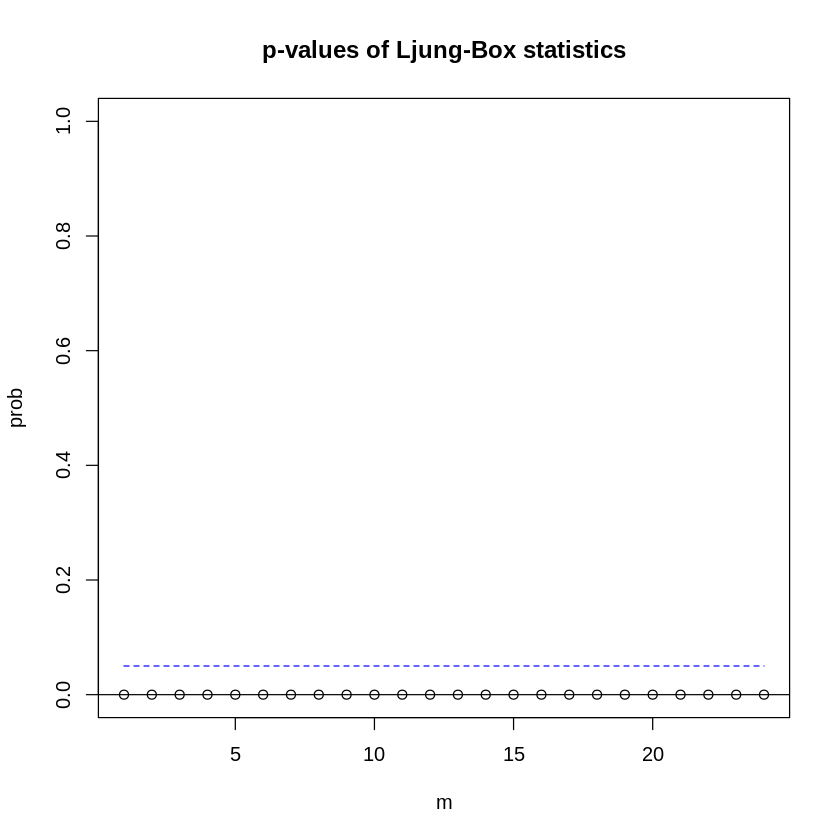

In [113]:
mq(vardata)

The p-value is 0, which is less than 0.05, so we can reject the null hypothesis. There is autocorrelation.

**Impulse Response Functions**

This involves tracking the impact of a random shock (such as an outlier or an unexpected one-time event) through the system and observing how its effects dissipate over time.

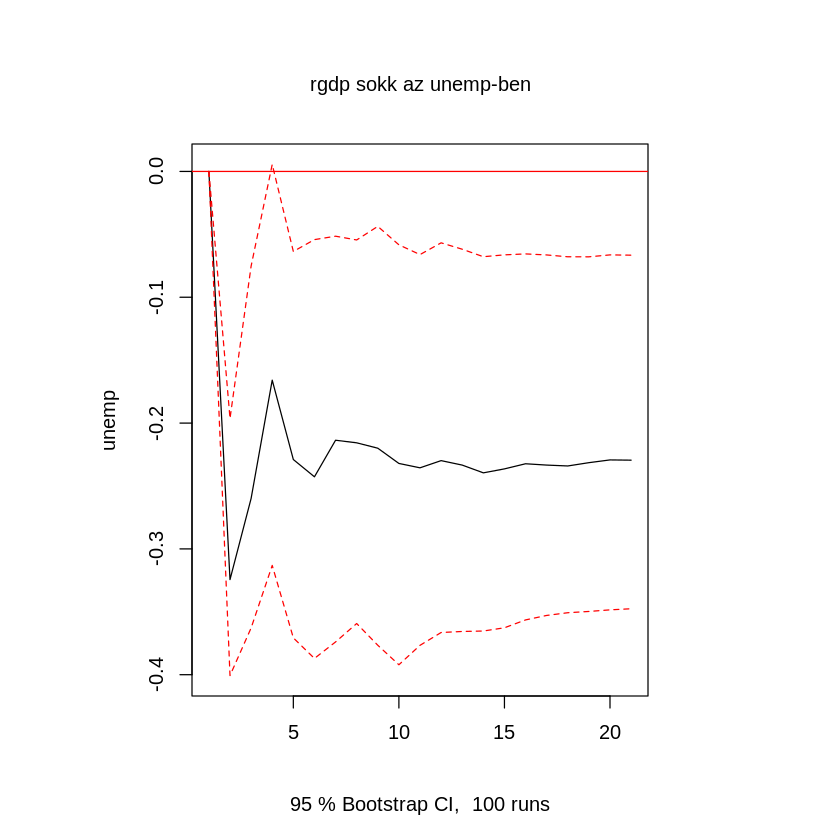

In [114]:
unemp_rgdp_sokk <- irf(modelVAR, impulse = 'rgdp', response = 'unemp', n.ahead = 20, boot = TRUE)
plot(unemp_rgdp_sokk, main = 'rgdp sokk az unemp-ben')

A one standard deviation change in the rgdp variable results in approximately a 0.34 standard deviation increase in unemp in the long run.

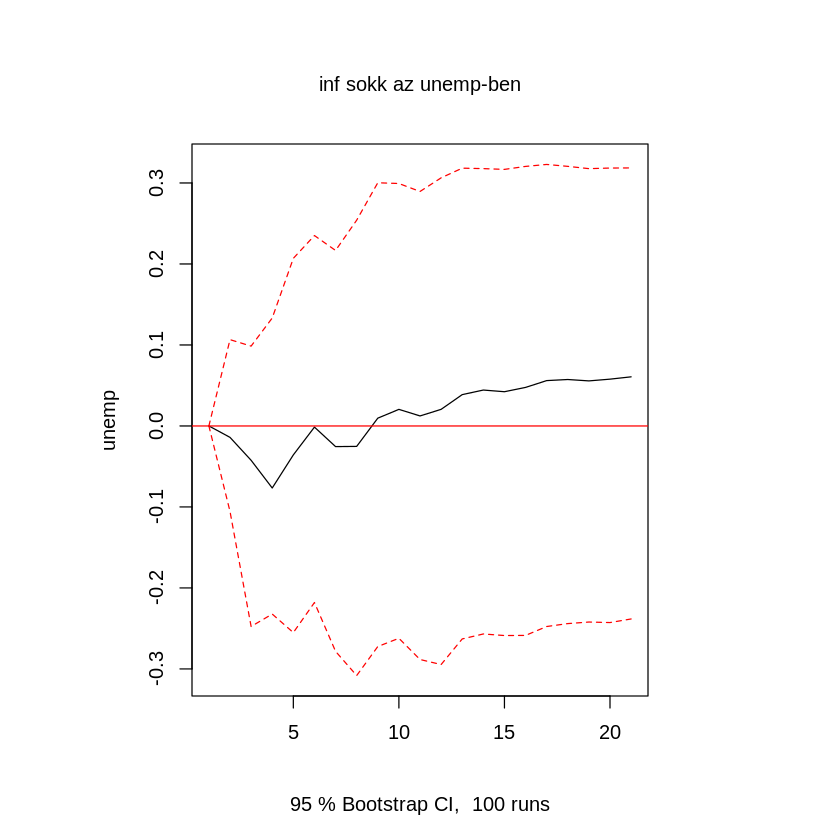

In [115]:
unemp_inf_sokk <- irf(modelVAR, impulse = 'inf', response = 'unemp', n.ahead = 20, boot = TRUE)
plot(unemp_inf_sokk, main = 'inf sokk az unemp-ben')

A one standard deviation change in the inf variable results in approximately a 0.38 standard deviation increase in unemp in the long run.

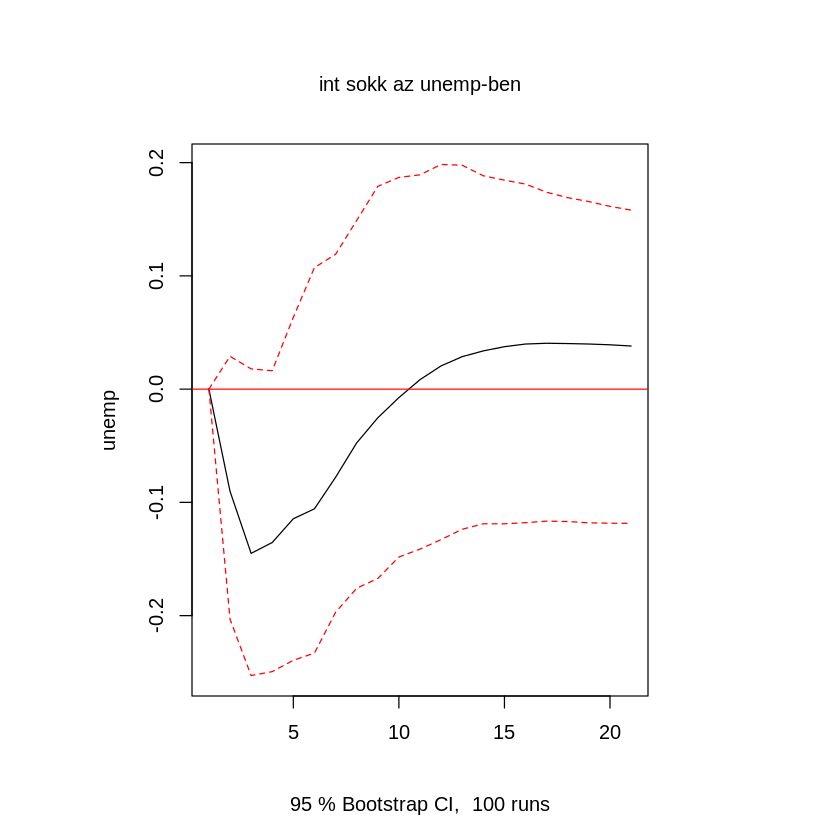

In [116]:
unemp_int_sokk <- irf(modelVAR, impulse = 'int', response = 'unemp', n.ahead = 20, boot = TRUE)
plot(unemp_int_sokk, main = 'int sokk az unemp-ben')

A one standard deviation change in the int variable results in approximately a 0.25 standard deviation increase in unemp in the long run.

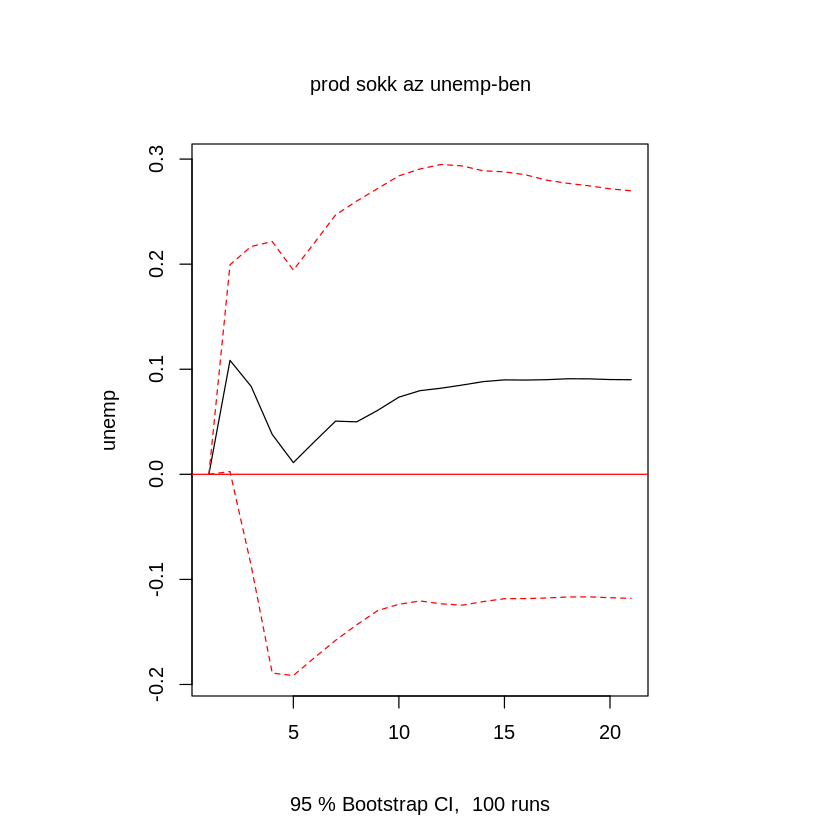

In [117]:
unemp_prod_sokk <- irf(modelVAR, impulse = 'prod', response = 'unemp', n.ahead = 20, boot = TRUE)
plot(unemp_prod_sokk, main = 'prod sokk az unemp-ben')

A one standard deviation change in the prod variable results in approximately a 0.37 standard deviation increase in unemp in the long run.

***Variance Decomposition***

This refers to the proportion of the variance in the dependent variable that can be explained by each of the independent variables.

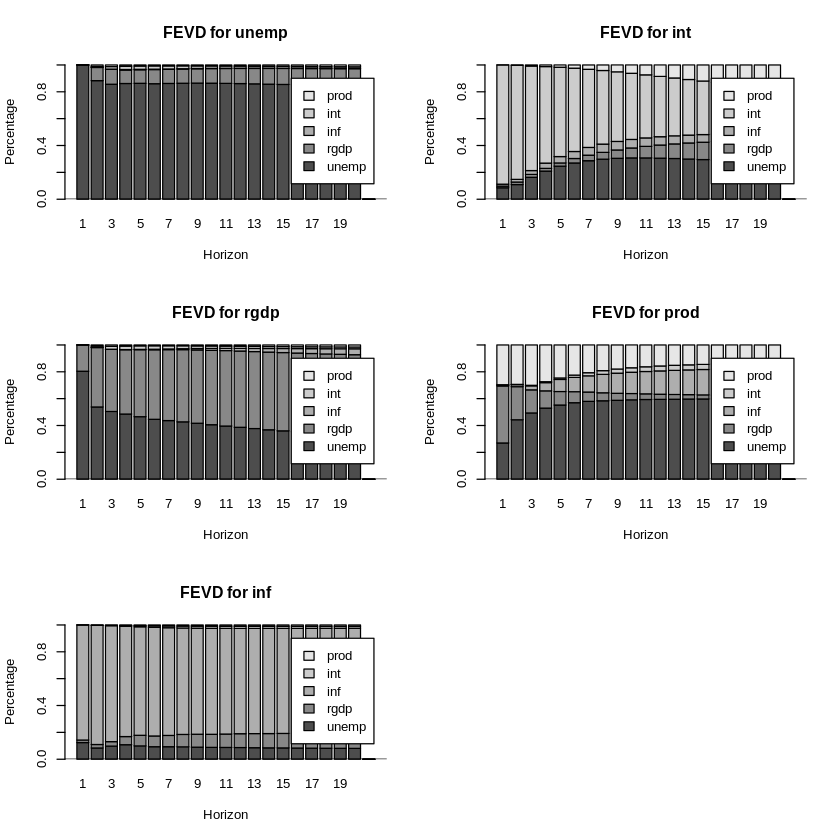

In [118]:
vardecomp <- fevd(modelVAR, n.ahead = 20)
plot(vardecomp)

### **Forecasting**

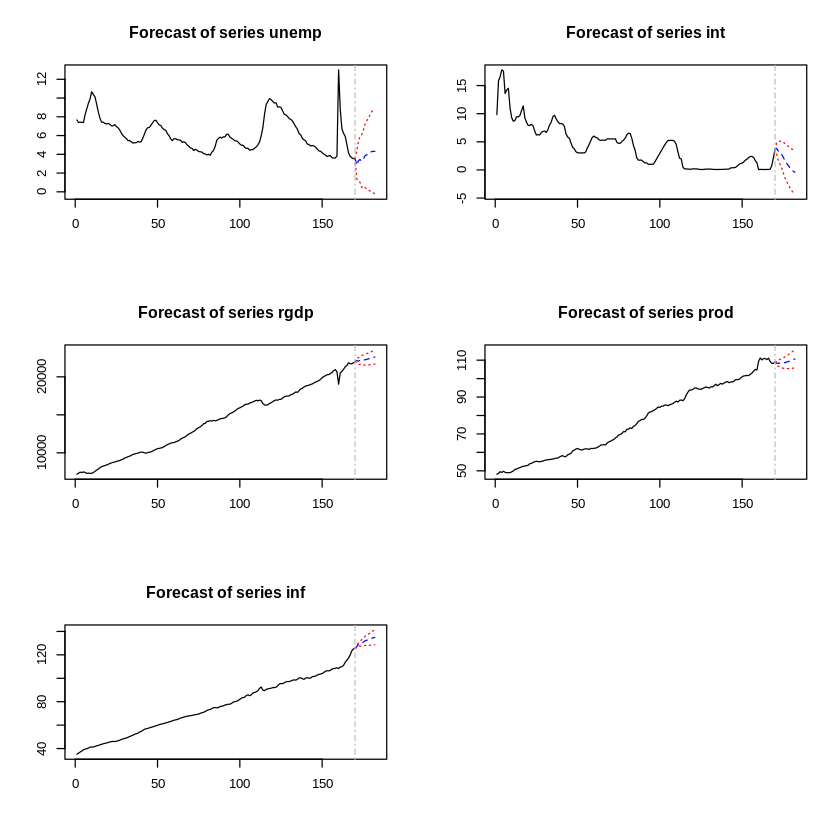

In [119]:
forecast <- predict(modelVAR, n.ahead = 12, ci = 0.95)
plot(forecast)

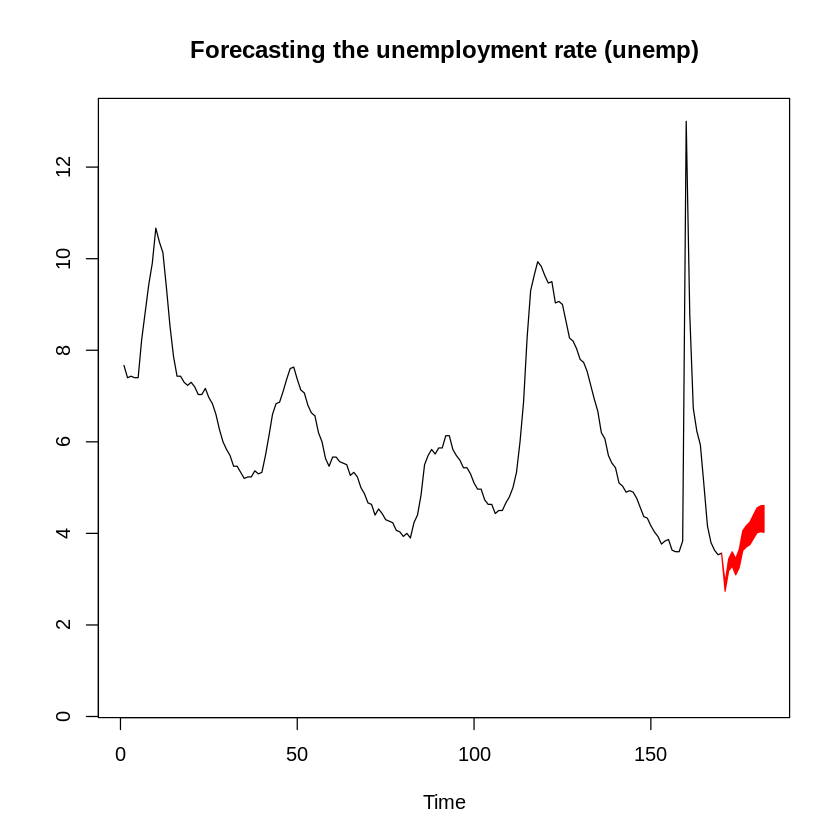

In [127]:
fanchart(forecast, names = 'unemp', main = 'Forecasting the unemployment rate (unemp)', xlab = 'Time', ylab = '', colors = 'red')

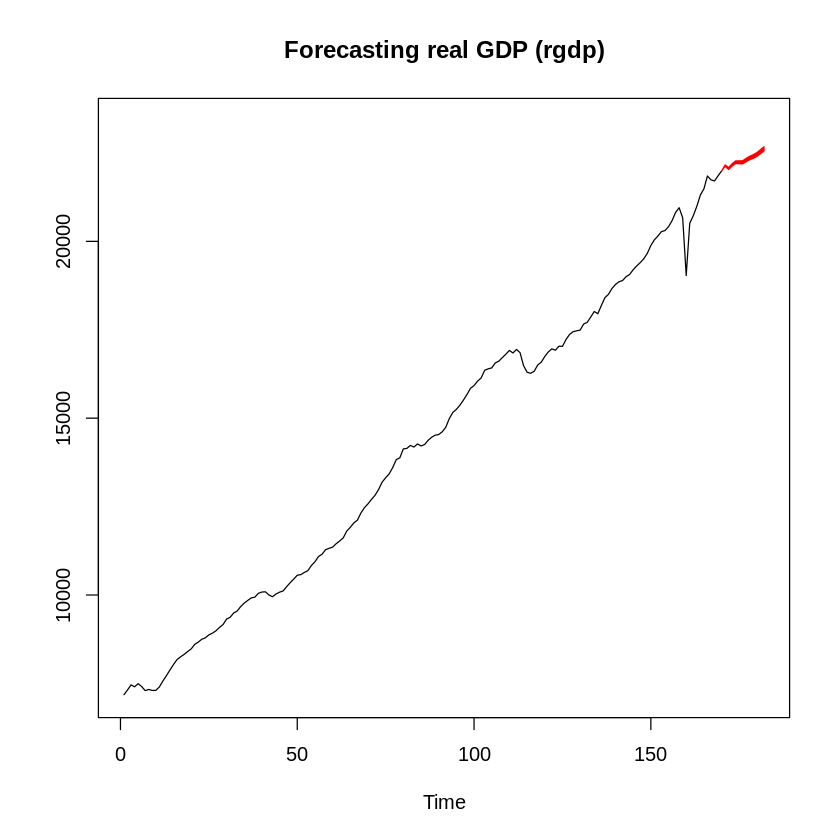

In [128]:
fanchart(forecast, names = 'rgdp', main = 'Forecasting real GDP (rgdp)', xlab = 'Time', ylab = '', colors = 'red')

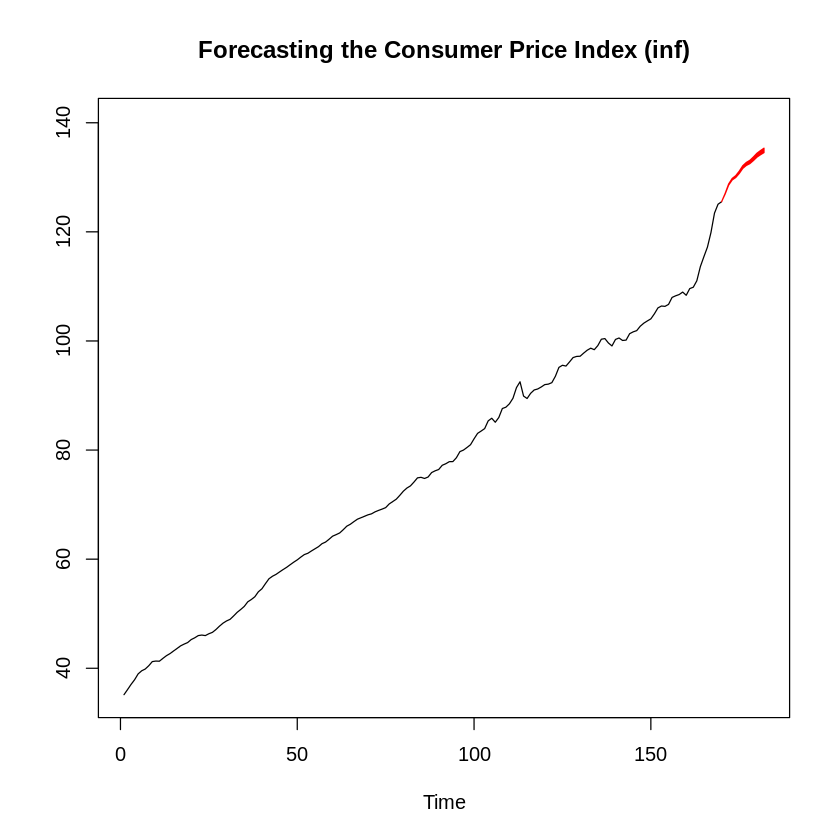

In [129]:
fanchart(forecast, names = 'inf', main = 'Forecasting the Consumer Price Index (inf)', xlab = 'Time', ylab = '', colors = 'red')

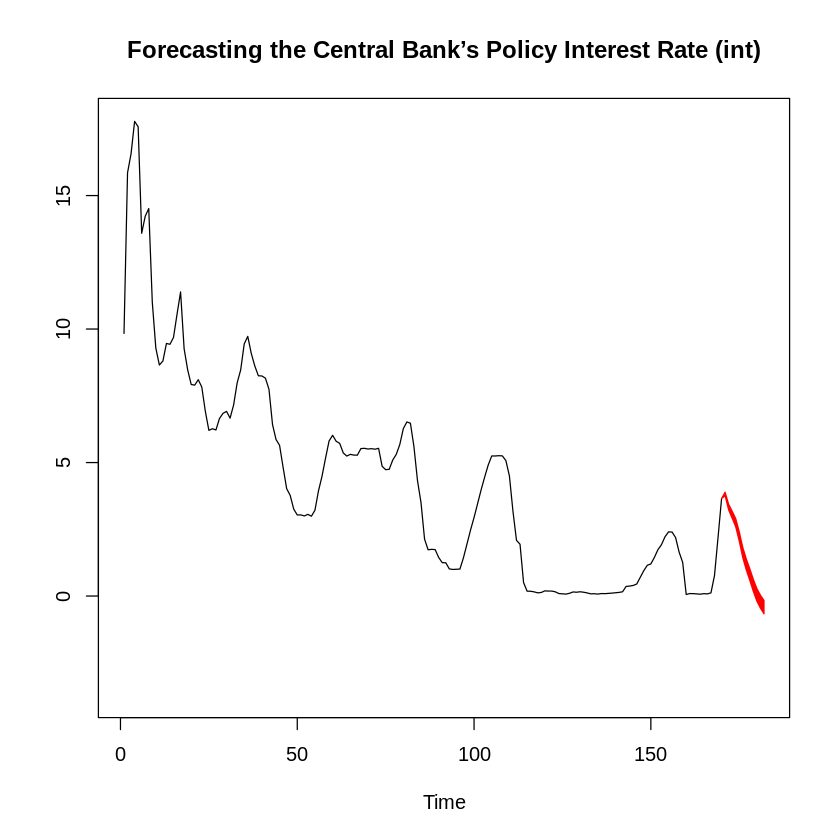

In [130]:
fanchart(forecast, names = 'int', main = 'Forecasting the Central Bank’s Policy Interest Rate (int)', xlab = 'Time', ylab = '', colors = 'red')

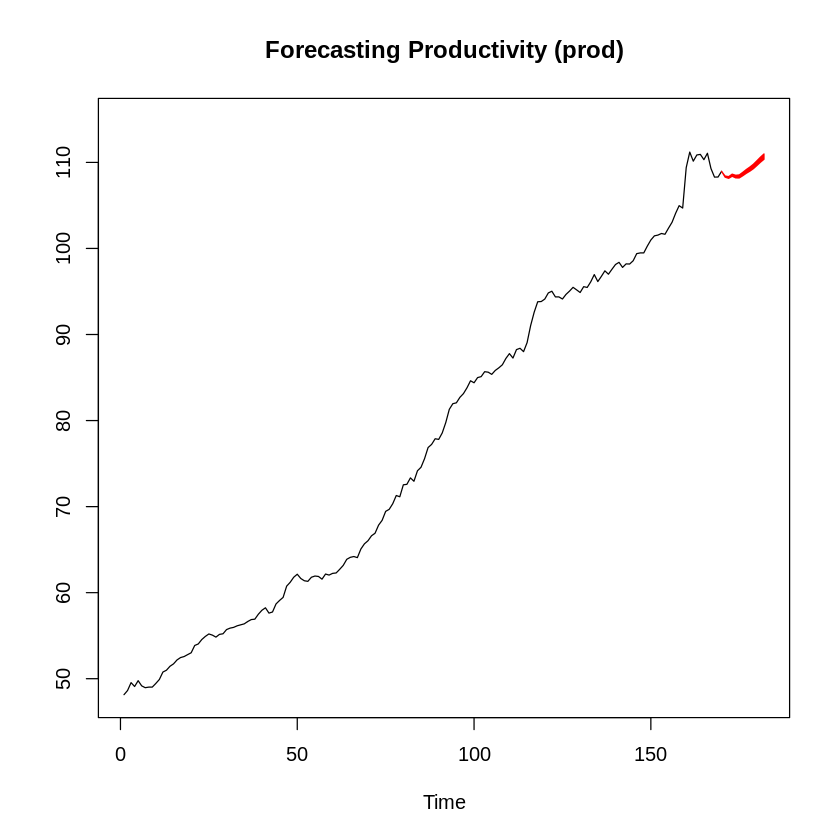

In [131]:
fanchart(forecast, names = 'prod', main = 'Forecasting Productivity (prod)', xlab = 'Time', ylab = '', colors = 'red')

In [132]:
forecast

$unemp
          fcst       lower    upper       CI
 [1,] 2.829569  1.37203806 4.287101 1.457531
 [2,] 3.310281  1.27996153 5.340600 2.030319
 [3,] 3.441845  0.99992215 5.883768 2.441923
 [4,] 3.270947  0.50234410 6.039550 2.768603
 [5,] 3.452712  0.34926224 6.556162 3.103450
 [6,] 3.841450  0.46929602 7.213605 3.372154
 [7,] 3.936151  0.31871145 7.553591 3.617440
 [8,] 3.999008  0.16320775 7.834808 3.835800
 [9,] 4.142179  0.10208671 8.182271 4.040092
[10,] 4.281131  0.04917020 8.513091 4.231961
[11,] 4.319010 -0.09050536 8.728526 4.409516
[12,] 4.316613 -0.25808145 8.891308 4.574695

$rgdp
          fcst    lower    upper       CI
 [1,] 22140.60 21822.47 22458.72 318.1251
 [2,] 22059.75 21613.73 22505.77 446.0192
 [3,] 22163.47 21639.46 22687.48 524.0127
 [4,] 22238.44 21654.66 22822.22 583.7763
 [5,] 22234.50 21587.53 22881.47 646.9688
 [6,] 22236.55 21538.28 22934.81 698.2645
 [7,] 22302.91 21561.02 23044.79 741.8887
 [8,] 22358.52 21576.80 23140.23 781.7148
 [9,] 22399.49 21578.37